In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import cartopy.crs as ccrs
import os
import datetime
from datetime import timedelta
from datetime import datetime
from matplotlib import ticker
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.feature as cfeature
import geopandas as gp
import regionmask
import matplotlib.patheffects as pe
import pooch
from matplotlib.lines import Line2D
from scipy import stats

GeoAxes._pcolormesh_patched = Axes.pcolormesh

In [2]:
def remove_time_mean(x):
    return x - x.mean(dim='time')

def standardize(x):
    return x/x.std(dim = 'time')

In [5]:
precip_datadir = '/dx01/data/CHIRPS/daily_precipitation_p25res/*.nc'
precip_data = xr.open_mfdataset(precip_datadir, parallel = True, combine = 'by_coords')

In [7]:
precip_data_SA = precip_data.precip.sel(latitude = slice(0,40),longitude = slice(60,100))
SA_monsoon_precip = precip_data_SA[precip_data_SA.time.dt.month.isin([5,6,7,8,9])]

In [8]:
import warnings
warnings.filterwarnings("ignore")

years_array = np.arange(1981,2021)
yearly_onset = np.zeros([len(SA_monsoon_precip.latitude), len(SA_monsoon_precip.longitude), len(years_array)])

for i in range(len(SA_monsoon_precip.latitude)):
    for j in range(len(SA_monsoon_precip.longitude)):
        
        print('latitude = ' + str(i))
        print('longitude = ' + str(j))
        
        grid_precip = SA_monsoon_precip.isel(latitude = i, longitude = j)
        
        wet_season_mean = grid_precip.mean().values
        
        if wet_season_mean > 0:

            for k in np.arange(len(years_array)):

                year = years_array[k]

                print('year = ' + str(year))

                yearly_precip = grid_precip[grid_precip.time.dt.year == year]
                yearly_precip_df = yearly_precip.to_dataframe()
                yearly_precip_df = yearly_precip_df.reset_index()

                # Take 5 day rolling sum and determine when we have wet spells
                yearly_precip_df['rolling'] = yearly_precip_df['precip'].rolling(5, center = False).sum().shift(-4)

                # Identify wet spells
                wet_spells = yearly_precip_df.loc[(yearly_precip_df['rolling'] >= wet_season_mean*5)]

                # Find last day of each spell
                wet_spells['dry_spell_start'] = wet_spells.time + timedelta(days = 5)
                wet_spells['dry_spell_end'] = wet_spells.time + timedelta(days = 15)

                # Find total precip during these days              
                for l in range(len(wet_spells)):

                    precip_after = yearly_precip_df.loc[yearly_precip_df.time.between(wet_spells['dry_spell_start'].iloc[l], wet_spells['dry_spell_end'].iloc[l])]

                    if (precip_after.precip.sum() >= 10) & (wet_spells['precip'].iloc[l] > 1):

                        current_year_onset = wet_spells.time.iloc[l]

                        print('Condition satisfied after wet spell #' + str(l+1))

                        break

                # Record as day of year #
                yearly_onset[i,j,k] = current_year_onset.timetuple().tm_yday
                
yearly_onset_tosave = yearly_onset.reshape(yearly_onset.shape[0], (yearly_onset.shape[1]*yearly_onset.shape[2]))

latitude = 0
longitude = 0
latitude = 0
longitude = 1
latitude = 0
longitude = 2
latitude = 0
longitude = 3
latitude = 0
longitude = 4
latitude = 0
longitude = 5
latitude = 0
longitude = 6
latitude = 0
longitude = 7
latitude = 0
longitude = 8
latitude = 0
longitude = 9
latitude = 0
longitude = 10
latitude = 0
longitude = 11
latitude = 0
longitude = 12
latitude = 0
longitude = 13
latitude = 0
longitude = 14
latitude = 0
longitude = 15
latitude = 0
longitude = 16
latitude = 0
longitude = 17
latitude = 0
longitude = 18
latitude = 0
longitude = 19
latitude = 0
longitude = 20
latitude = 0
longitude = 21
latitude = 0
longitude = 22
latitude = 0
longitude = 23
latitude = 0
longitude = 24
latitude = 0
longitude = 25
latitude = 0
longitude = 26
latitude = 0
longitude = 27
latitude = 0
longitude = 28
latitude = 0
longitude = 29
latitude = 0
longitude = 30
latitude = 0
longitude = 31
latitude = 0
longitude = 32
latitude = 0
longitude = 33
latitude = 0
longitude = 34
latitude = 0
longitude = 35
la

latitude = 2
longitude = 58
latitude = 2
longitude = 59
latitude = 2
longitude = 60
latitude = 2
longitude = 61
latitude = 2
longitude = 62
latitude = 2
longitude = 63
latitude = 2
longitude = 64
latitude = 2
longitude = 65
latitude = 2
longitude = 66
latitude = 2
longitude = 67
latitude = 2
longitude = 68
latitude = 2
longitude = 69
latitude = 2
longitude = 70
latitude = 2
longitude = 71
latitude = 2
longitude = 72
latitude = 2
longitude = 73
latitude = 2
longitude = 74
latitude = 2
longitude = 75
latitude = 2
longitude = 76
latitude = 2
longitude = 77
latitude = 2
longitude = 78
latitude = 2
longitude = 79
latitude = 2
longitude = 80
latitude = 2
longitude = 81
latitude = 2
longitude = 82
latitude = 2
longitude = 83
latitude = 2
longitude = 84
latitude = 2
longitude = 85
latitude = 2
longitude = 86
latitude = 2
longitude = 87
latitude = 2
longitude = 88
latitude = 2
longitude = 89
latitude = 2
longitude = 90
latitude = 2
longitude = 91
latitude = 2
longitude = 92
latitude = 2
longitu

latitude = 4
longitude = 134
latitude = 4
longitude = 135
latitude = 4
longitude = 136
latitude = 4
longitude = 137
latitude = 4
longitude = 138
latitude = 4
longitude = 139
latitude = 4
longitude = 140
latitude = 4
longitude = 141
latitude = 4
longitude = 142
latitude = 4
longitude = 143
latitude = 4
longitude = 144
latitude = 4
longitude = 145
latitude = 4
longitude = 146
latitude = 4
longitude = 147
latitude = 4
longitude = 148
latitude = 4
longitude = 149
year = 1981
Condition satisfied after wet spell #2
latitude = 4
longitude = 150
year = 1981
Condition satisfied after wet spell #1
latitude = 4
longitude = 151
year = 1981
Condition satisfied after wet spell #1
latitude = 4
longitude = 152
latitude = 4
longitude = 153
latitude = 4
longitude = 154
latitude = 4
longitude = 155
year = 1981
Condition satisfied after wet spell #1
latitude = 4
longitude = 156
year = 1981
Condition satisfied after wet spell #1
latitude = 4
longitude = 157
year = 1981
Condition satisfied after wet spell #

latitude = 7
longitude = 44
latitude = 7
longitude = 45
latitude = 7
longitude = 46
latitude = 7
longitude = 47
latitude = 7
longitude = 48
latitude = 7
longitude = 49
latitude = 7
longitude = 50
latitude = 7
longitude = 51
latitude = 7
longitude = 52
latitude = 7
longitude = 53
year = 1981
latitude = 7
longitude = 54
latitude = 7
longitude = 55
latitude = 7
longitude = 56
latitude = 7
longitude = 57
latitude = 7
longitude = 58
latitude = 7
longitude = 59
latitude = 7
longitude = 60
latitude = 7
longitude = 61
latitude = 7
longitude = 62
latitude = 7
longitude = 63
latitude = 7
longitude = 64
latitude = 7
longitude = 65
latitude = 7
longitude = 66
latitude = 7
longitude = 67
latitude = 7
longitude = 68
latitude = 7
longitude = 69
latitude = 7
longitude = 70
latitude = 7
longitude = 71
latitude = 7
longitude = 72
latitude = 7
longitude = 73
latitude = 7
longitude = 74
latitude = 7
longitude = 75
latitude = 7
longitude = 76
latitude = 7
longitude = 77
latitude = 7
longitude = 78
latitude

latitude = 9
longitude = 30
latitude = 9
longitude = 31
latitude = 9
longitude = 32
latitude = 9
longitude = 33
latitude = 9
longitude = 34
latitude = 9
longitude = 35
latitude = 9
longitude = 36
latitude = 9
longitude = 37
latitude = 9
longitude = 38
latitude = 9
longitude = 39
latitude = 9
longitude = 40
latitude = 9
longitude = 41
latitude = 9
longitude = 42
latitude = 9
longitude = 43
latitude = 9
longitude = 44
latitude = 9
longitude = 45
latitude = 9
longitude = 46
latitude = 9
longitude = 47
latitude = 9
longitude = 48
latitude = 9
longitude = 49
latitude = 9
longitude = 50
latitude = 9
longitude = 51
latitude = 9
longitude = 52
latitude = 9
longitude = 53
latitude = 9
longitude = 54
latitude = 9
longitude = 55
latitude = 9
longitude = 56
latitude = 9
longitude = 57
latitude = 9
longitude = 58
latitude = 9
longitude = 59
latitude = 9
longitude = 60
latitude = 9
longitude = 61
latitude = 9
longitude = 62
latitude = 9
longitude = 63
latitude = 9
longitude = 64
latitude = 9
longitu

Condition satisfied after wet spell #2
latitude = 11
longitude = 0
latitude = 11
longitude = 1
latitude = 11
longitude = 2
latitude = 11
longitude = 3
latitude = 11
longitude = 4
latitude = 11
longitude = 5
latitude = 11
longitude = 6
latitude = 11
longitude = 7
latitude = 11
longitude = 8
latitude = 11
longitude = 9
latitude = 11
longitude = 10
latitude = 11
longitude = 11
latitude = 11
longitude = 12
latitude = 11
longitude = 13
latitude = 11
longitude = 14
latitude = 11
longitude = 15
latitude = 11
longitude = 16
latitude = 11
longitude = 17
latitude = 11
longitude = 18
latitude = 11
longitude = 19
latitude = 11
longitude = 20
latitude = 11
longitude = 21
latitude = 11
longitude = 22
latitude = 11
longitude = 23
latitude = 11
longitude = 24
latitude = 11
longitude = 25
latitude = 11
longitude = 26
latitude = 11
longitude = 27
latitude = 11
longitude = 28
latitude = 11
longitude = 29
latitude = 11
longitude = 30
latitude = 11
longitude = 31
latitude = 11
longitude = 32
latitude = 11


latitude = 13
longitude = 19
latitude = 13
longitude = 20
latitude = 13
longitude = 21
latitude = 13
longitude = 22
latitude = 13
longitude = 23
latitude = 13
longitude = 24
latitude = 13
longitude = 25
latitude = 13
longitude = 26
latitude = 13
longitude = 27
latitude = 13
longitude = 28
latitude = 13
longitude = 29
latitude = 13
longitude = 30
latitude = 13
longitude = 31
latitude = 13
longitude = 32
latitude = 13
longitude = 33
latitude = 13
longitude = 34
latitude = 13
longitude = 35
latitude = 13
longitude = 36
latitude = 13
longitude = 37
latitude = 13
longitude = 38
latitude = 13
longitude = 39
latitude = 13
longitude = 40
latitude = 13
longitude = 41
latitude = 13
longitude = 42
latitude = 13
longitude = 43
latitude = 13
longitude = 44
latitude = 13
longitude = 45
latitude = 13
longitude = 46
latitude = 13
longitude = 47
latitude = 13
longitude = 48
latitude = 13
longitude = 49
latitude = 13
longitude = 50
latitude = 13
longitude = 51
latitude = 13
longitude = 52
latitude = 13


latitude = 15
longitude = 49
latitude = 15
longitude = 50
latitude = 15
longitude = 51
latitude = 15
longitude = 52
latitude = 15
longitude = 53
latitude = 15
longitude = 54
latitude = 15
longitude = 55
latitude = 15
longitude = 56
latitude = 15
longitude = 57
latitude = 15
longitude = 58
latitude = 15
longitude = 59
latitude = 15
longitude = 60
latitude = 15
longitude = 61
latitude = 15
longitude = 62
latitude = 15
longitude = 63
latitude = 15
longitude = 64
latitude = 15
longitude = 65
latitude = 15
longitude = 66
latitude = 15
longitude = 67
latitude = 15
longitude = 68
latitude = 15
longitude = 69
latitude = 15
longitude = 70
latitude = 15
longitude = 71
latitude = 15
longitude = 72
latitude = 15
longitude = 73
latitude = 15
longitude = 74
latitude = 15
longitude = 75
latitude = 15
longitude = 76
latitude = 15
longitude = 77
latitude = 15
longitude = 78
latitude = 15
longitude = 79
latitude = 15
longitude = 80
latitude = 15
longitude = 81
latitude = 15
longitude = 82
latitude = 15


latitude = 17
longitude = 98
latitude = 17
longitude = 99
latitude = 17
longitude = 100
latitude = 17
longitude = 101
latitude = 17
longitude = 102
latitude = 17
longitude = 103
latitude = 17
longitude = 104
latitude = 17
longitude = 105
latitude = 17
longitude = 106
latitude = 17
longitude = 107
latitude = 17
longitude = 108
latitude = 17
longitude = 109
latitude = 17
longitude = 110
latitude = 17
longitude = 111
latitude = 17
longitude = 112
latitude = 17
longitude = 113
latitude = 17
longitude = 114
latitude = 17
longitude = 115
latitude = 17
longitude = 116
latitude = 17
longitude = 117
latitude = 17
longitude = 118
latitude = 17
longitude = 119
latitude = 17
longitude = 120
latitude = 17
longitude = 121
latitude = 17
longitude = 122
latitude = 17
longitude = 123
latitude = 17
longitude = 124
latitude = 17
longitude = 125
latitude = 17
longitude = 126
latitude = 17
longitude = 127
latitude = 17
longitude = 128
latitude = 17
longitude = 129
latitude = 17
longitude = 130
latitude = 1

Condition satisfied after wet spell #1
latitude = 19
longitude = 142
year = 1981
Condition satisfied after wet spell #1
latitude = 19
longitude = 143
year = 1981
Condition satisfied after wet spell #1
latitude = 19
longitude = 144
year = 1981
Condition satisfied after wet spell #1
latitude = 19
longitude = 145
year = 1981
Condition satisfied after wet spell #1
latitude = 19
longitude = 146
year = 1981
Condition satisfied after wet spell #1
latitude = 19
longitude = 147
year = 1981
Condition satisfied after wet spell #1
latitude = 19
longitude = 148
year = 1981
Condition satisfied after wet spell #1
latitude = 19
longitude = 149
year = 1981
Condition satisfied after wet spell #1
latitude = 19
longitude = 150
year = 1981
Condition satisfied after wet spell #1
latitude = 19
longitude = 151
year = 1981
Condition satisfied after wet spell #1
latitude = 19
longitude = 152
latitude = 19
longitude = 153
latitude = 19
longitude = 154
latitude = 19
longitude = 155
latitude = 19
longitude = 156
l

latitude = 21
longitude = 156
latitude = 21
longitude = 157
latitude = 21
longitude = 158
latitude = 21
longitude = 159
latitude = 22
longitude = 0
latitude = 22
longitude = 1
latitude = 22
longitude = 2
latitude = 22
longitude = 3
latitude = 22
longitude = 4
latitude = 22
longitude = 5
latitude = 22
longitude = 6
latitude = 22
longitude = 7
latitude = 22
longitude = 8
latitude = 22
longitude = 9
latitude = 22
longitude = 10
latitude = 22
longitude = 11
latitude = 22
longitude = 12
latitude = 22
longitude = 13
latitude = 22
longitude = 14
latitude = 22
longitude = 15
latitude = 22
longitude = 16
latitude = 22
longitude = 17
latitude = 22
longitude = 18
latitude = 22
longitude = 19
latitude = 22
longitude = 20
latitude = 22
longitude = 21
latitude = 22
longitude = 22
latitude = 22
longitude = 23
latitude = 22
longitude = 24
latitude = 22
longitude = 25
latitude = 22
longitude = 26
latitude = 22
longitude = 27
latitude = 22
longitude = 28
latitude = 22
longitude = 29
latitude = 22
longit

latitude = 23
longitude = 123
latitude = 23
longitude = 124
latitude = 23
longitude = 125
latitude = 23
longitude = 126
latitude = 23
longitude = 127
latitude = 23
longitude = 128
latitude = 23
longitude = 129
latitude = 23
longitude = 130
latitude = 23
longitude = 131
latitude = 23
longitude = 132
latitude = 23
longitude = 133
latitude = 23
longitude = 134
latitude = 23
longitude = 135
latitude = 23
longitude = 136
latitude = 23
longitude = 137
latitude = 23
longitude = 138
latitude = 23
longitude = 139
latitude = 23
longitude = 140
latitude = 23
longitude = 141
year = 1981
Condition satisfied after wet spell #2
latitude = 23
longitude = 142
latitude = 23
longitude = 143
latitude = 23
longitude = 144
latitude = 23
longitude = 145
latitude = 23
longitude = 146
latitude = 23
longitude = 147
latitude = 23
longitude = 148
latitude = 23
longitude = 149
latitude = 23
longitude = 150
latitude = 23
longitude = 151
latitude = 23
longitude = 152
latitude = 23
longitude = 153
latitude = 23
longi

Condition satisfied after wet spell #1
latitude = 26
longitude = 81
year = 1981
Condition satisfied after wet spell #1
latitude = 26
longitude = 82
year = 1981
Condition satisfied after wet spell #1
latitude = 26
longitude = 83
year = 1981
Condition satisfied after wet spell #1
latitude = 26
longitude = 84
year = 1981
Condition satisfied after wet spell #1
latitude = 26
longitude = 85
year = 1981
Condition satisfied after wet spell #2
latitude = 26
longitude = 86
year = 1981
Condition satisfied after wet spell #4
latitude = 26
longitude = 87
latitude = 26
longitude = 88
latitude = 26
longitude = 89
latitude = 26
longitude = 90
latitude = 26
longitude = 91
latitude = 26
longitude = 92
latitude = 26
longitude = 93
latitude = 26
longitude = 94
latitude = 26
longitude = 95
latitude = 26
longitude = 96
latitude = 26
longitude = 97
latitude = 26
longitude = 98
latitude = 26
longitude = 99
latitude = 26
longitude = 100
latitude = 26
longitude = 101
latitude = 26
longitude = 102
latitude = 26


Condition satisfied after wet spell #1
latitude = 28
longitude = 82
year = 1981
Condition satisfied after wet spell #1
latitude = 28
longitude = 83
year = 1981
Condition satisfied after wet spell #1
latitude = 28
longitude = 84
year = 1981
Condition satisfied after wet spell #1
latitude = 28
longitude = 85
year = 1981
Condition satisfied after wet spell #2
latitude = 28
longitude = 86
year = 1981
Condition satisfied after wet spell #3
latitude = 28
longitude = 87
year = 1981
Condition satisfied after wet spell #28
latitude = 28
longitude = 88
latitude = 28
longitude = 89
latitude = 28
longitude = 90
latitude = 28
longitude = 91
latitude = 28
longitude = 92
latitude = 28
longitude = 93
latitude = 28
longitude = 94
latitude = 28
longitude = 95
latitude = 28
longitude = 96
latitude = 28
longitude = 97
latitude = 28
longitude = 98
latitude = 28
longitude = 99
latitude = 28
longitude = 100
latitude = 28
longitude = 101
latitude = 28
longitude = 102
latitude = 28
longitude = 103
latitude = 2

latitude = 30
longitude = 27
latitude = 30
longitude = 28
latitude = 30
longitude = 29
latitude = 30
longitude = 30
latitude = 30
longitude = 31
latitude = 30
longitude = 32
latitude = 30
longitude = 33
latitude = 30
longitude = 34
latitude = 30
longitude = 35
latitude = 30
longitude = 36
latitude = 30
longitude = 37
latitude = 30
longitude = 38
latitude = 30
longitude = 39
latitude = 30
longitude = 40
latitude = 30
longitude = 41
latitude = 30
longitude = 42
latitude = 30
longitude = 43
latitude = 30
longitude = 44
latitude = 30
longitude = 45
latitude = 30
longitude = 46
latitude = 30
longitude = 47
latitude = 30
longitude = 48
latitude = 30
longitude = 49
latitude = 30
longitude = 50
latitude = 30
longitude = 51
latitude = 30
longitude = 52
latitude = 30
longitude = 53
latitude = 30
longitude = 54
latitude = 30
longitude = 55
latitude = 30
longitude = 56
latitude = 30
longitude = 57
latitude = 30
longitude = 58
latitude = 30
longitude = 59
latitude = 30
longitude = 60
latitude = 30


Condition satisfied after wet spell #2
latitude = 31
longitude = 158
year = 1981
Condition satisfied after wet spell #1
latitude = 31
longitude = 159
year = 1981
Condition satisfied after wet spell #1
latitude = 32
longitude = 0
latitude = 32
longitude = 1
latitude = 32
longitude = 2
latitude = 32
longitude = 3
latitude = 32
longitude = 4
latitude = 32
longitude = 5
latitude = 32
longitude = 6
latitude = 32
longitude = 7
latitude = 32
longitude = 8
latitude = 32
longitude = 9
latitude = 32
longitude = 10
latitude = 32
longitude = 11
latitude = 32
longitude = 12
latitude = 32
longitude = 13
latitude = 32
longitude = 14
latitude = 32
longitude = 15
latitude = 32
longitude = 16
latitude = 32
longitude = 17
latitude = 32
longitude = 18
latitude = 32
longitude = 19
latitude = 32
longitude = 20
latitude = 32
longitude = 21
latitude = 32
longitude = 22
latitude = 32
longitude = 23
latitude = 32
longitude = 24
latitude = 32
longitude = 25
latitude = 32
longitude = 26
latitude = 32
longitude = 

Condition satisfied after wet spell #1
latitude = 33
longitude = 82
year = 1981
Condition satisfied after wet spell #1
latitude = 33
longitude = 83
year = 1981
Condition satisfied after wet spell #3
latitude = 33
longitude = 84
year = 1981
Condition satisfied after wet spell #3
latitude = 33
longitude = 85
year = 1981
Condition satisfied after wet spell #4
latitude = 33
longitude = 86
latitude = 33
longitude = 87
latitude = 33
longitude = 88
latitude = 33
longitude = 89
latitude = 33
longitude = 90
latitude = 33
longitude = 91
latitude = 33
longitude = 92
latitude = 33
longitude = 93
latitude = 33
longitude = 94
latitude = 33
longitude = 95
latitude = 33
longitude = 96
latitude = 33
longitude = 97
latitude = 33
longitude = 98
latitude = 33
longitude = 99
latitude = 33
longitude = 100
latitude = 33
longitude = 101
latitude = 33
longitude = 102
latitude = 33
longitude = 103
latitude = 33
longitude = 104
latitude = 33
longitude = 105
latitude = 33
longitude = 106
latitude = 33
longitude =

Condition satisfied after wet spell #1
latitude = 34
longitude = 157
year = 1981
Condition satisfied after wet spell #2
latitude = 34
longitude = 158
year = 1981
Condition satisfied after wet spell #2
latitude = 34
longitude = 159
year = 1981
Condition satisfied after wet spell #2
latitude = 35
longitude = 0
latitude = 35
longitude = 1
latitude = 35
longitude = 2
latitude = 35
longitude = 3
latitude = 35
longitude = 4
latitude = 35
longitude = 5
latitude = 35
longitude = 6
latitude = 35
longitude = 7
latitude = 35
longitude = 8
latitude = 35
longitude = 9
latitude = 35
longitude = 10
latitude = 35
longitude = 11
latitude = 35
longitude = 12
latitude = 35
longitude = 13
latitude = 35
longitude = 14
latitude = 35
longitude = 15
latitude = 35
longitude = 16
latitude = 35
longitude = 17
latitude = 35
longitude = 18
latitude = 35
longitude = 19
latitude = 35
longitude = 20
latitude = 35
longitude = 21
latitude = 35
longitude = 22
latitude = 35
longitude = 23
latitude = 35
longitude = 24
lat

Condition satisfied after wet spell #1
latitude = 36
longitude = 71
year = 1981
Condition satisfied after wet spell #3
latitude = 36
longitude = 72
year = 1981
Condition satisfied after wet spell #3
latitude = 36
longitude = 73
year = 1981
Condition satisfied after wet spell #3
latitude = 36
longitude = 74
year = 1981
Condition satisfied after wet spell #4
latitude = 36
longitude = 75
latitude = 36
longitude = 76
latitude = 36
longitude = 77
latitude = 36
longitude = 78
latitude = 36
longitude = 79
year = 1981
Condition satisfied after wet spell #4
latitude = 36
longitude = 80
year = 1981
Condition satisfied after wet spell #2
latitude = 36
longitude = 81
year = 1981
Condition satisfied after wet spell #1
latitude = 36
longitude = 82
year = 1981
Condition satisfied after wet spell #1
latitude = 36
longitude = 83
year = 1981
Condition satisfied after wet spell #3
latitude = 36
longitude = 84
latitude = 36
longitude = 85
latitude = 36
longitude = 86
latitude = 36
longitude = 87
latitude 

Condition satisfied after wet spell #1
latitude = 38
longitude = 66
year = 1981
Condition satisfied after wet spell #1
latitude = 38
longitude = 67
year = 1981
Condition satisfied after wet spell #1
latitude = 38
longitude = 68
year = 1981
Condition satisfied after wet spell #1
latitude = 38
longitude = 69
year = 1981
Condition satisfied after wet spell #2
latitude = 38
longitude = 70
year = 1981
Condition satisfied after wet spell #2
latitude = 38
longitude = 71
year = 1981
Condition satisfied after wet spell #3
latitude = 38
longitude = 72
year = 1981
Condition satisfied after wet spell #4
latitude = 38
longitude = 73
year = 1981
Condition satisfied after wet spell #3
latitude = 38
longitude = 74
year = 1981
Condition satisfied after wet spell #4
latitude = 38
longitude = 75
year = 1981
Condition satisfied after wet spell #4
latitude = 38
longitude = 76
latitude = 38
longitude = 77
latitude = 38
longitude = 78
latitude = 38
longitude = 79
year = 1981
Condition satisfied after wet spe

year = 1981
Condition satisfied after wet spell #1
latitude = 40
longitude = 67
year = 1981
Condition satisfied after wet spell #2
latitude = 40
longitude = 68
year = 1981
Condition satisfied after wet spell #2
latitude = 40
longitude = 69
year = 1981
Condition satisfied after wet spell #3
latitude = 40
longitude = 70
year = 1981
Condition satisfied after wet spell #3
latitude = 40
longitude = 71
year = 1981
Condition satisfied after wet spell #3
latitude = 40
longitude = 72
year = 1981
Condition satisfied after wet spell #3
latitude = 40
longitude = 73
year = 1981
Condition satisfied after wet spell #3
latitude = 40
longitude = 74
year = 1981
Condition satisfied after wet spell #3
latitude = 40
longitude = 75
year = 1981
Condition satisfied after wet spell #3
latitude = 40
longitude = 76
year = 1981
Condition satisfied after wet spell #4
latitude = 40
longitude = 77
latitude = 40
longitude = 78
latitude = 40
longitude = 79
latitude = 40
longitude = 80
latitude = 40
longitude = 81
lati

Condition satisfied after wet spell #2
latitude = 42
longitude = 69
year = 1981
Condition satisfied after wet spell #4
latitude = 42
longitude = 70
year = 1981
Condition satisfied after wet spell #4
latitude = 42
longitude = 71
year = 1981
Condition satisfied after wet spell #4
latitude = 42
longitude = 72
year = 1981
Condition satisfied after wet spell #3
latitude = 42
longitude = 73
year = 1981
Condition satisfied after wet spell #3
latitude = 42
longitude = 74
year = 1981
Condition satisfied after wet spell #3
latitude = 42
longitude = 75
year = 1981
Condition satisfied after wet spell #3
latitude = 42
longitude = 76
year = 1981
Condition satisfied after wet spell #3
latitude = 42
longitude = 77
year = 1981
Condition satisfied after wet spell #4
latitude = 42
longitude = 78
year = 1981
Condition satisfied after wet spell #3
latitude = 42
longitude = 79
year = 1981
Condition satisfied after wet spell #3
latitude = 42
longitude = 80
latitude = 42
longitude = 81
latitude = 42
longitude

latitude = 44
longitude = 61
latitude = 44
longitude = 62
latitude = 44
longitude = 63
year = 1981
Condition satisfied after wet spell #1
latitude = 44
longitude = 64
year = 1981
Condition satisfied after wet spell #2
latitude = 44
longitude = 65
year = 1981
Condition satisfied after wet spell #3
latitude = 44
longitude = 66
year = 1981
Condition satisfied after wet spell #2
latitude = 44
longitude = 67
year = 1981
Condition satisfied after wet spell #3
latitude = 44
longitude = 68
year = 1981
Condition satisfied after wet spell #3
latitude = 44
longitude = 69
year = 1981
Condition satisfied after wet spell #3
latitude = 44
longitude = 70
year = 1981
Condition satisfied after wet spell #3
latitude = 44
longitude = 71
year = 1981
Condition satisfied after wet spell #2
latitude = 44
longitude = 72
year = 1981
Condition satisfied after wet spell #2
latitude = 44
longitude = 73
year = 1981
Condition satisfied after wet spell #3
latitude = 44
longitude = 74
year = 1981
Condition satisfied a

Condition satisfied after wet spell #1
latitude = 45
longitude = 155
year = 1981
Condition satisfied after wet spell #1
latitude = 45
longitude = 156
year = 1981
Condition satisfied after wet spell #1
latitude = 45
longitude = 157
year = 1981
Condition satisfied after wet spell #1
latitude = 45
longitude = 158
year = 1981
Condition satisfied after wet spell #1
latitude = 45
longitude = 159
latitude = 46
longitude = 0
latitude = 46
longitude = 1
latitude = 46
longitude = 2
latitude = 46
longitude = 3
latitude = 46
longitude = 4
latitude = 46
longitude = 5
latitude = 46
longitude = 6
latitude = 46
longitude = 7
latitude = 46
longitude = 8
latitude = 46
longitude = 9
latitude = 46
longitude = 10
latitude = 46
longitude = 11
latitude = 46
longitude = 12
latitude = 46
longitude = 13
latitude = 46
longitude = 14
latitude = 46
longitude = 15
latitude = 46
longitude = 16
latitude = 46
longitude = 17
latitude = 46
longitude = 18
latitude = 46
longitude = 19
latitude = 46
longitude = 20
latitude

Condition satisfied after wet spell #5
latitude = 47
longitude = 78
year = 1981
Condition satisfied after wet spell #10
latitude = 47
longitude = 79
year = 1981
Condition satisfied after wet spell #3
latitude = 47
longitude = 80
latitude = 47
longitude = 81
latitude = 47
longitude = 82
latitude = 47
longitude = 83
latitude = 47
longitude = 84
latitude = 47
longitude = 85
latitude = 47
longitude = 86
latitude = 47
longitude = 87
latitude = 47
longitude = 88
latitude = 47
longitude = 89
latitude = 47
longitude = 90
latitude = 47
longitude = 91
latitude = 47
longitude = 92
latitude = 47
longitude = 93
latitude = 47
longitude = 94
latitude = 47
longitude = 95
latitude = 47
longitude = 96
latitude = 47
longitude = 97
latitude = 47
longitude = 98
latitude = 47
longitude = 99
latitude = 47
longitude = 100
latitude = 47
longitude = 101
latitude = 47
longitude = 102
latitude = 47
longitude = 103
latitude = 47
longitude = 104
latitude = 47
longitude = 105
latitude = 47
longitude = 106
latitude =

latitude = 49
longitude = 14
latitude = 49
longitude = 15
latitude = 49
longitude = 16
latitude = 49
longitude = 17
latitude = 49
longitude = 18
latitude = 49
longitude = 19
latitude = 49
longitude = 20
latitude = 49
longitude = 21
latitude = 49
longitude = 22
latitude = 49
longitude = 23
latitude = 49
longitude = 24
latitude = 49
longitude = 25
latitude = 49
longitude = 26
latitude = 49
longitude = 27
latitude = 49
longitude = 28
latitude = 49
longitude = 29
latitude = 49
longitude = 30
latitude = 49
longitude = 31
latitude = 49
longitude = 32
latitude = 49
longitude = 33
latitude = 49
longitude = 34
latitude = 49
longitude = 35
latitude = 49
longitude = 36
latitude = 49
longitude = 37
latitude = 49
longitude = 38
latitude = 49
longitude = 39
latitude = 49
longitude = 40
latitude = 49
longitude = 41
latitude = 49
longitude = 42
latitude = 49
longitude = 43
latitude = 49
longitude = 44
latitude = 49
longitude = 45
latitude = 49
longitude = 46
latitude = 49
longitude = 47
latitude = 49


year = 1981
Condition satisfied after wet spell #2
latitude = 50
longitude = 76
year = 1981
Condition satisfied after wet spell #2
latitude = 50
longitude = 77
year = 1981
Condition satisfied after wet spell #3
latitude = 50
longitude = 78
year = 1981
Condition satisfied after wet spell #3
latitude = 50
longitude = 79
year = 1981
Condition satisfied after wet spell #3
latitude = 50
longitude = 80
year = 1981
Condition satisfied after wet spell #9
latitude = 50
longitude = 81
latitude = 50
longitude = 82
latitude = 50
longitude = 83
latitude = 50
longitude = 84
latitude = 50
longitude = 85
latitude = 50
longitude = 86
latitude = 50
longitude = 87
latitude = 50
longitude = 88
latitude = 50
longitude = 89
latitude = 50
longitude = 90
latitude = 50
longitude = 91
latitude = 50
longitude = 92
latitude = 50
longitude = 93
latitude = 50
longitude = 94
latitude = 50
longitude = 95
latitude = 50
longitude = 96
latitude = 50
longitude = 97
latitude = 50
longitude = 98
latitude = 50
longitude = 9

Condition satisfied after wet spell #1
latitude = 51
longitude = 159
year = 1981
Condition satisfied after wet spell #1
latitude = 52
longitude = 0
latitude = 52
longitude = 1
latitude = 52
longitude = 2
latitude = 52
longitude = 3
latitude = 52
longitude = 4
latitude = 52
longitude = 5
latitude = 52
longitude = 6
latitude = 52
longitude = 7
latitude = 52
longitude = 8
latitude = 52
longitude = 9
latitude = 52
longitude = 10
latitude = 52
longitude = 11
latitude = 52
longitude = 12
latitude = 52
longitude = 13
latitude = 52
longitude = 14
latitude = 52
longitude = 15
latitude = 52
longitude = 16
latitude = 52
longitude = 17
latitude = 52
longitude = 18
latitude = 52
longitude = 19
latitude = 52
longitude = 20
latitude = 52
longitude = 21
latitude = 52
longitude = 22
latitude = 52
longitude = 23
latitude = 52
longitude = 24
latitude = 52
longitude = 25
latitude = 52
longitude = 26
latitude = 52
longitude = 27
latitude = 52
longitude = 28
latitude = 52
longitude = 29
latitude = 52
longit

Condition satisfied after wet spell #9
latitude = 53
longitude = 71
year = 1981
Condition satisfied after wet spell #8
latitude = 53
longitude = 72
year = 1981
Condition satisfied after wet spell #6
latitude = 53
longitude = 73
year = 1981
Condition satisfied after wet spell #2
latitude = 53
longitude = 74
year = 1981
Condition satisfied after wet spell #6
latitude = 53
longitude = 75
year = 1981
Condition satisfied after wet spell #3
latitude = 53
longitude = 76
year = 1981
Condition satisfied after wet spell #3
latitude = 53
longitude = 77
year = 1981
Condition satisfied after wet spell #3
latitude = 53
longitude = 78
year = 1981
Condition satisfied after wet spell #3
latitude = 53
longitude = 79
year = 1981
Condition satisfied after wet spell #3
latitude = 53
longitude = 80
year = 1981
Condition satisfied after wet spell #6
latitude = 53
longitude = 81
year = 1981
Condition satisfied after wet spell #7
latitude = 53
longitude = 82
latitude = 53
longitude = 83
latitude = 53
longitude

Condition satisfied after wet spell #4
latitude = 55
longitude = 60
year = 1981
Condition satisfied after wet spell #5
latitude = 55
longitude = 61
year = 1981
Condition satisfied after wet spell #4
latitude = 55
longitude = 62
year = 1981
Condition satisfied after wet spell #2
latitude = 55
longitude = 63
year = 1981
Condition satisfied after wet spell #10
latitude = 55
longitude = 64
year = 1981
Condition satisfied after wet spell #5
latitude = 55
longitude = 65
year = 1981
Condition satisfied after wet spell #13
latitude = 55
longitude = 66
year = 1981
Condition satisfied after wet spell #15
latitude = 55
longitude = 67
year = 1981
Condition satisfied after wet spell #1
latitude = 55
longitude = 68
year = 1981
Condition satisfied after wet spell #13
latitude = 55
longitude = 69
year = 1981
Condition satisfied after wet spell #13
latitude = 55
longitude = 70
year = 1981
Condition satisfied after wet spell #15
latitude = 55
longitude = 71
year = 1981
Condition satisfied after wet spel

latitude = 56
longitude = 94
latitude = 56
longitude = 95
latitude = 56
longitude = 96
latitude = 56
longitude = 97
latitude = 56
longitude = 98
latitude = 56
longitude = 99
latitude = 56
longitude = 100
latitude = 56
longitude = 101
latitude = 56
longitude = 102
latitude = 56
longitude = 103
latitude = 56
longitude = 104
latitude = 56
longitude = 105
latitude = 56
longitude = 106
latitude = 56
longitude = 107
latitude = 56
longitude = 108
latitude = 56
longitude = 109
latitude = 56
longitude = 110
latitude = 56
longitude = 111
latitude = 56
longitude = 112
latitude = 56
longitude = 113
latitude = 56
longitude = 114
latitude = 56
longitude = 115
latitude = 56
longitude = 116
latitude = 56
longitude = 117
latitude = 56
longitude = 118
latitude = 56
longitude = 119
latitude = 56
longitude = 120
latitude = 56
longitude = 121
latitude = 56
longitude = 122
latitude = 56
longitude = 123
latitude = 56
longitude = 124
latitude = 56
longitude = 125
latitude = 56
longitude = 126
latitude = 56
lo

Condition satisfied after wet spell #2
latitude = 58
longitude = 0
latitude = 58
longitude = 1
latitude = 58
longitude = 2
latitude = 58
longitude = 3
latitude = 58
longitude = 4
latitude = 58
longitude = 5
latitude = 58
longitude = 6
latitude = 58
longitude = 7
latitude = 58
longitude = 8
latitude = 58
longitude = 9
latitude = 58
longitude = 10
latitude = 58
longitude = 11
latitude = 58
longitude = 12
latitude = 58
longitude = 13
latitude = 58
longitude = 14
latitude = 58
longitude = 15
latitude = 58
longitude = 16
latitude = 58
longitude = 17
latitude = 58
longitude = 18
latitude = 58
longitude = 19
latitude = 58
longitude = 20
latitude = 58
longitude = 21
latitude = 58
longitude = 22
latitude = 58
longitude = 23
latitude = 58
longitude = 24
latitude = 58
longitude = 25
latitude = 58
longitude = 26
latitude = 58
longitude = 27
latitude = 58
longitude = 28
latitude = 58
longitude = 29
latitude = 58
longitude = 30
latitude = 58
longitude = 31
latitude = 58
longitude = 32
latitude = 58


Condition satisfied after wet spell #1
latitude = 59
longitude = 61
year = 1981
Condition satisfied after wet spell #1
latitude = 59
longitude = 62
year = 1981
Condition satisfied after wet spell #1
latitude = 59
longitude = 63
year = 1981
Condition satisfied after wet spell #7
latitude = 59
longitude = 64
year = 1981
Condition satisfied after wet spell #15
latitude = 59
longitude = 65
year = 1981
Condition satisfied after wet spell #12
latitude = 59
longitude = 66
year = 1981
Condition satisfied after wet spell #10
latitude = 59
longitude = 67
year = 1981
Condition satisfied after wet spell #10
latitude = 59
longitude = 68
year = 1981
Condition satisfied after wet spell #13
latitude = 59
longitude = 69
year = 1981
Condition satisfied after wet spell #2
latitude = 59
longitude = 70
year = 1981
Condition satisfied after wet spell #6
latitude = 59
longitude = 71
year = 1981
Condition satisfied after wet spell #13
latitude = 59
longitude = 72
year = 1981
Condition satisfied after wet spel

latitude = 61
longitude = 39
latitude = 61
longitude = 40
latitude = 61
longitude = 41
latitude = 61
longitude = 42
latitude = 61
longitude = 43
latitude = 61
longitude = 44
latitude = 61
longitude = 45
latitude = 61
longitude = 46
latitude = 61
longitude = 47
latitude = 61
longitude = 48
latitude = 61
longitude = 49
latitude = 61
longitude = 50
latitude = 61
longitude = 51
latitude = 61
longitude = 52
latitude = 61
longitude = 53
latitude = 61
longitude = 54
latitude = 61
longitude = 55
year = 1981
Condition satisfied after wet spell #1
latitude = 61
longitude = 56
year = 1981
Condition satisfied after wet spell #1
latitude = 61
longitude = 57
year = 1981
Condition satisfied after wet spell #1
latitude = 61
longitude = 58
year = 1981
Condition satisfied after wet spell #1
latitude = 61
longitude = 59
year = 1981
Condition satisfied after wet spell #1
latitude = 61
longitude = 60
year = 1981
Condition satisfied after wet spell #1
latitude = 61
longitude = 61
year = 1981
Condition satis

Condition satisfied after wet spell #4
latitude = 62
longitude = 78
year = 1981
Condition satisfied after wet spell #4
latitude = 62
longitude = 79
year = 1981
Condition satisfied after wet spell #3
latitude = 62
longitude = 80
year = 1981
Condition satisfied after wet spell #4
latitude = 62
longitude = 81
latitude = 62
longitude = 82
latitude = 62
longitude = 83
latitude = 62
longitude = 84
latitude = 62
longitude = 85
latitude = 62
longitude = 86
latitude = 62
longitude = 87
latitude = 62
longitude = 88
latitude = 62
longitude = 89
latitude = 62
longitude = 90
latitude = 62
longitude = 91
latitude = 62
longitude = 92
latitude = 62
longitude = 93
latitude = 62
longitude = 94
latitude = 62
longitude = 95
latitude = 62
longitude = 96
latitude = 62
longitude = 97
latitude = 62
longitude = 98
latitude = 62
longitude = 99
latitude = 62
longitude = 100
latitude = 62
longitude = 101
latitude = 62
longitude = 102
latitude = 62
longitude = 103
latitude = 62
longitude = 104
latitude = 62
longit

Condition satisfied after wet spell #1
latitude = 63
longitude = 141
year = 1981
Condition satisfied after wet spell #1
latitude = 63
longitude = 142
year = 1981
Condition satisfied after wet spell #1
latitude = 63
longitude = 143
latitude = 63
longitude = 144
latitude = 63
longitude = 145
latitude = 63
longitude = 146
latitude = 63
longitude = 147
latitude = 63
longitude = 148
latitude = 63
longitude = 149
latitude = 63
longitude = 150
year = 1981
Condition satisfied after wet spell #1
latitude = 63
longitude = 151
year = 1981
Condition satisfied after wet spell #1
latitude = 63
longitude = 152
year = 1981
Condition satisfied after wet spell #1
latitude = 63
longitude = 153
year = 1981
Condition satisfied after wet spell #2
latitude = 63
longitude = 154
year = 1981
Condition satisfied after wet spell #1
latitude = 63
longitude = 155
year = 1981
Condition satisfied after wet spell #1
latitude = 63
longitude = 156
year = 1981
Condition satisfied after wet spell #1
latitude = 63
longitud

Condition satisfied after wet spell #1
latitude = 65
longitude = 60
year = 1981
Condition satisfied after wet spell #5
latitude = 65
longitude = 61
year = 1981
Condition satisfied after wet spell #9
latitude = 65
longitude = 62
year = 1981
Condition satisfied after wet spell #1
latitude = 65
longitude = 63
year = 1981
Condition satisfied after wet spell #1
latitude = 65
longitude = 64
year = 1981
Condition satisfied after wet spell #1
latitude = 65
longitude = 65
year = 1981
Condition satisfied after wet spell #1
latitude = 65
longitude = 66
year = 1981
Condition satisfied after wet spell #1
latitude = 65
longitude = 67
year = 1981
Condition satisfied after wet spell #5
latitude = 65
longitude = 68
year = 1981
Condition satisfied after wet spell #3
latitude = 65
longitude = 69
year = 1981
Condition satisfied after wet spell #1
latitude = 65
longitude = 70
year = 1981
Condition satisfied after wet spell #1
latitude = 65
longitude = 71
year = 1981
Condition satisfied after wet spell #1
l

Condition satisfied after wet spell #4
latitude = 66
longitude = 75
year = 1981
Condition satisfied after wet spell #4
latitude = 66
longitude = 76
year = 1981
Condition satisfied after wet spell #1
latitude = 66
longitude = 77
year = 1981
Condition satisfied after wet spell #1
latitude = 66
longitude = 78
year = 1981
Condition satisfied after wet spell #1
latitude = 66
longitude = 79
year = 1981
Condition satisfied after wet spell #4
latitude = 66
longitude = 80
year = 1981
Condition satisfied after wet spell #4
latitude = 66
longitude = 81
year = 1981
Condition satisfied after wet spell #4
latitude = 66
longitude = 82
year = 1981
Condition satisfied after wet spell #4
latitude = 66
longitude = 83
year = 1981
Condition satisfied after wet spell #8
latitude = 66
longitude = 84
year = 1981
Condition satisfied after wet spell #3
latitude = 66
longitude = 85
year = 1981
Condition satisfied after wet spell #4
latitude = 66
longitude = 86
year = 1981
Condition satisfied after wet spell #4
l

Condition satisfied after wet spell #4
latitude = 67
longitude = 84
year = 1981
Condition satisfied after wet spell #4
latitude = 67
longitude = 85
year = 1981
Condition satisfied after wet spell #3
latitude = 67
longitude = 86
year = 1981
Condition satisfied after wet spell #3
latitude = 67
longitude = 87
year = 1981
Condition satisfied after wet spell #5
latitude = 67
longitude = 88
year = 1981
Condition satisfied after wet spell #3
latitude = 67
longitude = 89
year = 1981
Condition satisfied after wet spell #1
latitude = 67
longitude = 90
latitude = 67
longitude = 91
latitude = 67
longitude = 92
latitude = 67
longitude = 93
latitude = 67
longitude = 94
latitude = 67
longitude = 95
latitude = 67
longitude = 96
latitude = 67
longitude = 97
latitude = 67
longitude = 98
latitude = 67
longitude = 99
latitude = 67
longitude = 100
latitude = 67
longitude = 101
latitude = 67
longitude = 102
latitude = 67
longitude = 103
latitude = 67
longitude = 104
latitude = 67
longitude = 105
latitude = 

Condition satisfied after wet spell #1
latitude = 68
longitude = 139
year = 1981
Condition satisfied after wet spell #2
latitude = 68
longitude = 140
year = 1981
Condition satisfied after wet spell #1
latitude = 68
longitude = 141
year = 1981
Condition satisfied after wet spell #2
latitude = 68
longitude = 142
year = 1981
Condition satisfied after wet spell #1
latitude = 68
longitude = 143
year = 1981
Condition satisfied after wet spell #1
latitude = 68
longitude = 144
year = 1981
Condition satisfied after wet spell #1
latitude = 68
longitude = 145
year = 1981
Condition satisfied after wet spell #1
latitude = 68
longitude = 146
year = 1981
Condition satisfied after wet spell #1
latitude = 68
longitude = 147
year = 1981
Condition satisfied after wet spell #2
latitude = 68
longitude = 148
year = 1981
Condition satisfied after wet spell #2
latitude = 68
longitude = 149
year = 1981
Condition satisfied after wet spell #1
latitude = 68
longitude = 150
year = 1981
Condition satisfied after we

Condition satisfied after wet spell #2
latitude = 69
longitude = 148
year = 1981
Condition satisfied after wet spell #2
latitude = 69
longitude = 149
year = 1981
Condition satisfied after wet spell #2
latitude = 69
longitude = 150
year = 1981
Condition satisfied after wet spell #1
latitude = 69
longitude = 151
year = 1981
Condition satisfied after wet spell #1
latitude = 69
longitude = 152
year = 1981
Condition satisfied after wet spell #2
latitude = 69
longitude = 153
year = 1981
Condition satisfied after wet spell #3
latitude = 69
longitude = 154
year = 1981
Condition satisfied after wet spell #3
latitude = 69
longitude = 155
year = 1981


KeyboardInterrupt: 

### Calculate gridcell level retreat date

In [8]:
import warnings
warnings.filterwarnings("ignore")

years_array = np.arange(1981,2021)
yearly_retreat = np.zeros([len(SA_monsoon_precip.latitude), len(SA_monsoon_precip.longitude), len(years_array)])

for i in range(len(SA_monsoon_precip.latitude)):
    
    print('latitude = ' + str(i))
    
    for j in range(len(SA_monsoon_precip.longitude)):
            
        grid_precip = SA_monsoon_precip.isel(latitude = i, longitude = j)
        wet_season_mean = grid_precip.mean().values
        
        if wet_season_mean > 0:

            for k in np.arange(len(years_array)):

                year = years_array[k]
                
                yearly_precip = grid_precip[grid_precip.time.dt.year == year]
                yearly_precip_df = yearly_precip.to_dataframe()
                yearly_precip_df = yearly_precip_df.reset_index()

                # Take 5 day rolling sum and determine when we have wet spells
                yearly_precip_df['rolling'] = yearly_precip_df['precip'].rolling(5, center = False).sum().shift(-4)

                # Identify wet spells
                wet_spells = yearly_precip_df.loc[(yearly_precip_df['rolling'] >= wet_season_mean*5)]

                # Find last day of each dry spell
                wet_spells['dry_spell_start'] = wet_spells.time + timedelta(days = -10)
                wet_spells['dry_spell_end'] = wet_spells.time + timedelta(days = -1)
                wet_spells['wet_spell_end'] = wet_spells.time + timedelta(days = 5)
                
                # Make sure only have dates in monsoon season
                wet_spells = wet_spells[wet_spells.wet_spell_end.dt.month < 10]

                # Find total precip during these days              
                for l in range(len(wet_spells)-1,-1,-1):

                    precip_before = yearly_precip_df.loc[yearly_precip_df["time"].between(wet_spells['dry_spell_start'].iloc[l], wet_spells['dry_spell_end'].iloc[l])]

                    if (precip_before.precip.sum() >= 10) & (yearly_precip_df[yearly_precip_df.time == wet_spells['wet_spell_end'].iloc[l]].precip.values > 1):

                        current_year_retreat = wet_spells.wet_spell_end.iloc[l]

                        #print('Condition satisfied after wet spell #' + str(l))

                        break
                        
                # Record as day of year #
                retreat = current_year_retreat.timetuple().tm_yday
                yearly_retreat[i,j,k] = current_year_retreat.timetuple().tm_yday # do this so that have the LAST day of wet spell

yearly_retreat_tosave = yearly_retreat.reshape(yearly_retreat.shape[0], (yearly_retreat.shape[1]*yearly_retreat.shape[2]))

latitude = 0
latitude = 1
latitude = 2
latitude = 3
latitude = 4
latitude = 5
latitude = 6
latitude = 7
latitude = 8
latitude = 9
latitude = 10
latitude = 11
latitude = 12
latitude = 13
latitude = 14
latitude = 15
latitude = 16
latitude = 17
latitude = 18
latitude = 19
latitude = 20
latitude = 21
latitude = 22
latitude = 23
latitude = 24
latitude = 25
latitude = 26
latitude = 27
latitude = 28
latitude = 29
latitude = 30
latitude = 31
latitude = 32
latitude = 33
latitude = 34
latitude = 35
latitude = 36
latitude = 37
latitude = 38
latitude = 39
latitude = 40
latitude = 41
latitude = 42
latitude = 43
latitude = 44
latitude = 45
latitude = 46
latitude = 47
latitude = 48
latitude = 49
latitude = 50
latitude = 51
latitude = 52
latitude = 53
latitude = 54
latitude = 55
latitude = 56
latitude = 57
latitude = 58
latitude = 59
latitude = 60
latitude = 61
latitude = 62
latitude = 63
latitude = 64
latitude = 65
latitude = 66
latitude = 67
latitude = 68
latitude = 69
latitude = 70
latitude = 71
la

In [9]:
save_dir = '/dx01/ivanov/data/CHIRPS/monsoon_humidheat_timing/'

filename1 = 'gridpt_yearly_retreat.csv'

np.savetxt(save_dir + filename1, yearly_retreat_tosave, delimiter=',')

filename2 = 'gridpt_yearly_onset.csv'

np.savetxt(save_dir + filename2, yearly_onset_tosave, delimiter=',')

In [10]:
gridpt_retreat = pd.read_csv(save_dir+filename1, header = None)
gridpt_retreat_array = np.array(gridpt_retreat)

gridpt_onset = pd.read_csv(save_dir+filename2, header = None)
gridpt_onset_array = np.array(gridpt_onset)

# Precip anom on 99th percentile Tw days

In [9]:
SA_monsoon_precip.load()

<xarray.DataArray 'precip' (time: 6120, latitude: 160, longitude: 160)>
array([[[        nan,         nan,         nan, ..., 11.531626  ,
         12.767307  , 18.20913   ],
        [        nan,         nan,         nan, ..., 15.685879  ,
         13.56422   , 15.781587  ],
        [        nan,         nan,         nan, ..., 11.873086  ,
         11.538952  ,  9.733242  ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[        nan,         nan,         nan, ...,  6.1260757 ,
          4.4778852 ,  0.9591607 ],
        [        nan,         nan,         nan, ...,  4.3472066 ,
          4.1279764 ,  4.5501103 ],
        [        nan,         nan,         nan, ...,  6.0662017 ,
          3.9124756 ,  5.0543914 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[        nan,         nan,         nan, ...,  2.7866194 ,
          7.2784514 ,  9.060626  ],
        [        nan,         nan,         nan, ...,  3.885708  ,
          5.7776403 ,  9.004286  ],
        [        nan,         nan,         nan, ...,  5.0646553 ,
          5.499732  ,  7.6831126 ],
        ...,
        [15.721911  , 15.105541  , 15.926043  , ...,  0.        ,
          0.        ,  0.        ],
        [12.635048  , 13.923173  , 15.981611  , ...,  0.        ,
          0.        ,  0.        ],
        [10.498269  , 10.049626  , 10.513756  , ...,  0.        ,
          0.        ,  0.        ]],

       ...,

       [[        nan,         nan,         nan, ...,  7.2153316 ,
          2.7466779 ,  9.559085  ],
        [        nan,         nan,         nan, ..., 17.904892  ,
         11.04736   ,  7.5142937 ],
        [        nan,         nan,         nan, ..., 15.135767  ,
         14.707919  ,  7.695702  ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[        nan,         nan,         nan, ...,  4.540705  ,
          1.9380412 ,  2.525075  ],
        [        nan,         nan,         nan, ...,  3.5713499 ,
          2.5077503 ,  4.4281983 ],
        [        nan,         nan,         nan, ...,  1.9905877 ,
          1.304644  ,  5.1022434 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[        nan,         nan,         nan, ...,  5.090784  ,
          2.250563  ,  0.40756944],
        [        nan,         nan,         nan, ...,  1.5081636 ,
          0.        ,  0.        ],
        [        nan,         nan,         nan, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 60.125 60.375 60.625 ... 99.375 99.625 99.875
  * latitude   (latitude) float32 0.125 0.37

In [101]:
precip_map = SA_monsoon_precip.mean(dim = 'time')

/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'precip' (latitude: 160, longitude: 160)>
array([[       nan,        nan,        nan, ..., 7.36779   , 7.682728  ,
        8.183263  ],
       [       nan,        nan,        nan, ..., 7.3306513 , 6.515916  ,
        7.09444   ],
       [       nan,        nan,        nan, ..., 5.932658  , 5.426354  ,
        5.453249  ],
       ...,
       [0.1332648 , 0.13386433, 0.14038508, ..., 0.7936345 , 0.70233226,
        0.6142299 ],
       [0.12697093, 0.13740718, 0.15133056, ..., 0.53830415, 0.5153819 ,
        0.53791606],
       [0.12655911, 0.12906979, 0.12938887, ..., 0.4574271 , 0.48090476,
        0.48284805]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 60.125 60.375 60.625 ... 99.375 99.625 99.875
  * latitude   (latitude) float32 0.125 0.375 0.625 ... 39.375 39.625 39.875

In [19]:
precip_std = SA_monsoon_precip.std(dim = 'time')

In [8]:
precip_data_SA_anom = precip_data_SA.groupby('time.dayofyear').apply(remove_time_mean)

/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [9]:
precip_data_SA_anom.load()

<xarray.DataArray 'precip' (time: 14610, latitude: 160, longitude: 160)>
array([[[           nan,            nan,            nan, ...,
         -9.3655510e+00, -9.5709524e+00, -1.0648402e+01],
        [           nan,            nan,            nan, ...,
         -8.5055304e+00, -8.5872278e+00, -9.9001179e+00],
        [           nan,            nan,            nan, ...,
         -8.8961840e+00, -8.4703350e+00, -8.9726286e+00],
        ...,
        [-5.1096451e-01, -4.6256781e-01, -4.9515611e-01, ...,
         -3.8514830e-02, -3.2920901e-02, -2.2721041e-02],
        [-3.2877463e-01, -3.4816858e-01, -2.2572510e-01, ...,
         -3.7482560e-02, -2.0643687e-02, -1.6673027e-02],
        [-2.4204698e-01, -1.9136791e-01, -1.3474211e-01, ...,
         -3.9874386e-02, -3.4115586e-02, -2.0462003e-02]],

       [[           nan,            nan,            nan, ...,
         -6.8903351e+00, -5.6196041e+00, -3.6519632e+00],
        [           nan,            nan,            nan, ...,
         -2.2731576e+00, -2.5399218e+00, -4.2502460e+00],
        [           nan,            nan,            nan, ...,
         -3.5479608e+00, -3.6756454e+00, -5.1242290e+00],
        ...,
        [-5.2322644e-01, -5.7907021e-01, -6.5480030e-01, ...,
         -4.8041917e-02, -5.3666919e-02, -5.7485998e-02],
        [-4.7774124e-01, -4.9867028e-01, -4.9873286e-01, ...,
         -5.6273688e-02, -6.2660858e-02, -6.9661252e-02],
        [-3.7058780e-01, -4.3625316e-01, -3.6738253e-01, ...,
         -6.7448832e-02, -6.3911922e-02, -7.3874630e-02]],

       [[           nan,            nan,            nan, ...,
          3.2261360e+01,  4.3144779e+01,  5.2798382e+01],
        [           nan,            nan,            nan, ...,
          1.9604170e+01,  3.9062988e+01,  5.3466084e+01],
        [           nan,            nan,            nan, ...,
          1.4568095e+01,  2.7622227e+01,  4.1238468e+01],
        ...,
        [-6.7187130e-01, -6.5378541e-01, -6.9012296e-01, ...,
         -2.3947228e-02, -2.7681127e-02, -1.3133077e-02],
        [-5.1912630e-01, -5.9117746e-01, -5.5458677e-01, ...,
         -3.7686914e-02, -2.9802546e-02, -2.1113113e-02],
        [-6.1654890e-01, -5.5851907e-01, -4.5202166e-01, ...,
         -7.1462341e-02, -3.8042437e-02, -2.5321845e-02]],

       ...,

       [[           nan,            nan,            nan, ...,
          9.2911243e-01,  3.4475555e+00,  7.2175627e+00],
        [           nan,            nan,            nan, ...,
          3.1421204e+00,  6.5715485e+00,  1.0329237e+00],
        [           nan,            nan,            nan, ...,
          8.1021051e+00,  7.3590240e+00,  8.7517996e+00],
        ...,
        [-5.2295935e-01, -5.6016612e-01, -4.9957410e-01, ...,
         -9.1463393e-03, -8.9512691e-03, -5.4739481e-03],
        [-2.3391339e-01, -2.8392452e-01, -3.8710982e-01, ...,
         -2.0944636e-02, -1.4248647e-02, -8.6135827e-03],
        [-1.5714298e-01, -1.6043705e-01, -9.5457211e-02, ...,
         -2.0454248e-02, -2.6483450e-02, -3.0427223e-02]],

       [[           nan,            nan,            nan, ...,
          9.3968296e+00,  1.6513288e+01,  2.1128700e+01],
        [           nan,            nan,            nan, ...,
          1.1710485e+01,  1.1601219e+01,  2.3458092e+01],
        [           nan,            nan,            nan, ...,
          9.1138439e+00,  6.9782362e+00,  6.8390350e+00],
        ...,
        [-1.6599059e-01, -2.5545380e-01, -3.3126396e-01, ...,
         -5.8641504e-02, -6.2405664e-02, -6.2502004e-02],
        [-1.8306847e-01, -2.5684822e-01, -2.5508982e-01, ...,
         -4.4122241e-02, -5.7065181e-02, -5.8375888e-02],
        [-1.4297636e-01, -1.6303840e-01, -2.1276958e-01, ...,
         -5.1581539e-02, -6.2531397e-02, -5.6023538e-02]],

       [[           nan,            nan,            nan, ...,
         -4.9635663e+00,  1.4001255e+00,  5.0789309e+00],
        [           nan,            nan,            nan, ...,
         -1.1780090e+00,  5.2398086e+00,  3.8141117e+00],

In [10]:
precip_data_SA.load()

<xarray.DataArray 'precip' (time: 14610, latitude: 160, longitude: 160)>
array([[[       nan,        nan,        nan, ...,  0.       ,
          0.       ,  0.       ],
        [       nan,        nan,        nan, ...,  0.       ,
          0.       ,  0.       ],
        [       nan,        nan,        nan, ...,  0.       ,
          0.       ,  0.       ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ]],

       [[       nan,        nan,        nan, ...,  3.051796 ,
          5.8156624,  8.932159 ],
        [       nan,        nan,        nan, ...,  7.2535377,
          7.2787905,  7.123951 ],
        [       nan,        nan,        nan, ...,  6.0178266,
          5.869492 ,  6.316446 ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ]],

       [[       nan,        nan,        nan, ..., 42.92222  ,
         55.962826 , 66.70807  ],
        [       nan,        nan,        nan, ..., 31.356102 ,
         51.83531  , 67.21364  ],
        [       nan,        nan,        nan, ..., 26.634094 ,
         39.025013 , 53.084915 ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ]],

       ...,

       [[       nan,        nan,        nan, ..., 12.655694 ,
         18.00142  , 20.427414 ],
        [       nan,        nan,        nan, ..., 17.056208 ,
         20.371283 , 13.012395 ],
        [       nan,        nan,        nan, ..., 20.288977 ,
         17.741653 , 18.197664 ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ]],

       [[       nan,        nan,        nan, ..., 20.452608 ,
         29.357258 , 34.855053 ],
        [       nan,        nan,        nan, ..., 23.3918   ,
         24.332819 , 37.35131  ],
        [       nan,        nan,        nan, ..., 20.47108  ,
         18.66668  , 18.473356 ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ]],

       [[       nan,        nan,        nan, ...,  1.8807353,
          7.942115 , 12.688447 ],
        [       nan,        nan,        nan, ...,  6.7913847,
         12.539299 ,  9.94682  ],
        [       nan,        nan,        nan, ...,  7.069717 ,
         10.54572  , 10.666564 ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 60.125 60.375 60.625 ... 99.375 99.625 99.875
  * latitude   (latitude) float32 0.125 0.375 0.625 ... 39.375 39.625 39.875
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2020-12-31
Attributes:
    units:               mm/day
    standard_name:       convective precipitation rate
    long_

In [12]:
TW_regional.load()

<xarray.DataArray 'TW' (time: 23376, longitude: 161, latitude: 161)>
array([[[  2.0015147 ,   2.4148018 ,   2.636321  , ...,  23.968927  ,
          23.972845  ,  24.025068  ],
        [  1.9350626 ,   2.4262583 ,   2.6914763 , ...,  23.949797  ,
          23.978107  ,  24.022608  ],
        [  1.7824056 ,   2.3719645 ,   2.7143223 , ...,  23.990862  ,
          23.998798  ,  24.020496  ],
        ...,
        [ -5.4814467 ,  -5.9177003 ,  -5.576268  , ...,  23.606009  ,
          25.10943   ,  24.69001   ],
        [ -5.9490585 ,  -6.2125907 ,  -5.9225297 , ...,  21.98496   ,
          23.651495  ,  25.022896  ],
        [ -6.0184693 ,  -6.1632485 ,  -6.0350437 , ...,  22.680496  ,
          22.83837   ,  24.102211  ]],

       [[ -0.17591171,   0.49347007,   1.077959  , ...,  23.831635  ,
          23.839687  ,  23.85583   ],
        [ -0.22120625,   0.4215425 ,   0.99846023, ...,  23.814718  ,
          23.821882  ,  23.87183   ],
        [ -0.2550479 ,   0.3310575 ,   0.9997529 , ...,  23.827892  ,
          23.834566  ,  23.864828  ],
        ...,
        [ -9.211295  ,  -9.310352  ,  -8.4286995 , ...,  23.11628   ,
          24.870983  ,  24.685202  ],
        [ -9.968489  , -10.028794  ,  -9.081114  , ...,  21.061567  ,
          23.013071  ,  24.79554   ],
        [-10.513267  , -10.287268  ,  -9.476755  , ...,  21.67203   ,
          21.223654  ,  23.021381  ]],

       [[ -3.5697405 ,  -2.4395227 ,  -1.5134327 , ...,  23.961214  ,
          24.1386    ,  24.301594  ],
        [ -3.8002048 ,  -2.8089378 ,  -1.9593668 , ...,  24.092733  ,
          24.24394   ,  24.284735  ],
        [ -3.9205859 ,  -3.1243262 ,  -2.4181798 , ...,  24.235914  ,
          24.23429   ,  24.287804  ],
        ...,
        [-11.12276   , -10.992406  , -10.052733  , ...,  24.375559  ,
          25.298643  ,  24.66444   ],
        [-11.998756  , -11.813605  , -10.752253  , ...,  22.206203  ,
          24.048203  ,  26.115433  ],
        [-12.69805   , -12.121835  , -11.138742  , ...,  22.679258  ,
          22.709364  ,  24.846073  ]],

       ...,

       [[  6.3005385 ,   6.4904504 ,   6.8179584 , ...,  23.908548  ,
          23.943148  ,  24.013517  ],
        [  6.0297656 ,   6.2034764 ,   6.56985   , ...,  23.98011   ,
          24.008085  ,  24.064272  ],
        [  5.787619  ,   5.9887505 ,   6.34082   , ...,  23.938686  ,
          23.992285  ,  24.019451  ],
        ...,
        [ -6.8692646 ,  -7.1310425 ,  -6.1793985 , ...,  22.689684  ,
          25.167206  ,  24.66456   ],
        [ -7.2100053 ,  -7.08176   ,  -6.42733   , ...,  21.448717  ,
          23.058441  ,  25.214392  ],
        [ -7.5771194 ,  -7.0355606 ,  -6.5736814 , ...,  21.974022  ,
          21.906935  ,  23.107569  ]],

       [[  4.141189  ,   4.1396503 ,   4.2634087 , ...,  22.951042  ,
          22.8754    ,  22.83862   ],
        [  4.117168  ,   4.0789275 ,   4.2773366 , ...,  22.890635  ,
          22.863085  ,  22.887909  ],
        [  4.146716  ,   4.087801  ,   4.335149  , ...,  23.033016  ,
          22.938211  ,  22.924784  ],
        ...,
        [ -6.3154006 ,  -6.919961  ,  -6.202173  , ...,  23.926142  ,
          25.908762  ,  25.088472  ],
        [ -6.5867505 ,  -7.023649  ,  -6.4707184 , ...,  22.361057  ,
          24.293686  ,  25.76553   ],
        [ -6.671329  ,  -6.652614  ,  -6.381652  , ...,  23.029087  ,
          22.907202  ,  23.930458  ]],

       [[ -0.92608035,  -0.61301005,   0.14240538, ...,  23.2331    ,
          23.208149  ,  23.194693  ],
        [ -1.0481141 ,  -0.8026908 ,  -0.25628677, ...,  23.237051  ,
          23.214476  ,  23.181704  ],
        [ -1.1437391 ,  -0.975     ,  -0.4783176 , ...,  23.298983  ,
          23.228794  ,  23.16357   ],
        ...,
        [ -6.599296  ,  -7.5868425 ,  -6.9256377 , ...,  23.114779  ,
          25.227749  ,  25.066896  ],
        [ -6.922777  ,  -7.579433  ,  -6.77214   , ...,  22.010061  ,
          23.655815  ,  25.614378  ],
        [ -7.00607   ,  -7.1962495 ,  -6.57187   ,

In [ ]:
temp_regional.load()

In [ ]:
q_regional.load()

In [115]:
from datetime import datetime

precip_99TW = np.zeros([160,160])
precipanom_99TW = np.zeros([160,160])
TW99 = np.zeros([160,160])
T_99TW = np.zeros([160,160])
q_99TW = np.zeros([160,160])
dry_TW99 = np.zeros([160,160])
frac_before = np.zeros([160,160])
frac_after = np.zeros([160,160])
frac_post_monsoon = np.zeros([160,160])
frac_after_norm = np.zeros([160,160])
years_array = np.arange(1981,2021)

days_diff = np.zeros([160,160])

for i in range(160):
    
    print('i = ' + str(i))
    
    for j in range(160):
        
        TW_grid = TW_regional.isel(longitude = j + 1, latitude = -i-1)
        T_grid = temp_regional.isel(longitude = j + 1, latitude = -i-1)
        q_grid = q_regional.isel(longitude = j + 1, latitude = -i-1)
        precip_grid = precip_data_SA.isel(longitude = j, latitude = i)
        precip_anom_grid = precip_data_SA_anom.isel(longitude = j, latitude = i)
        
        # Put all data in dataframe
        pt_TW_df = TW_grid.to_dataframe()
        pt_TW_df = pt_TW_df.drop(columns = ['longitude','latitude'])
        
        pt_T_df = T_grid.to_dataframe()
        pt_T_df = pt_T_df.drop(columns = ['longitude','latitude'])
        
        pt_q_df = q_grid.to_dataframe()
        pt_q_df = pt_q_df.drop(columns = ['longitude','latitude'])
        
        pt_precip_df = precip_grid.to_dataframe()
        pt_precip_df = pt_precip_df.drop(columns = ['longitude','latitude'])
        pt_precipanom_df = precip_anom_grid.to_dataframe()
        pt_precipanom_df = pt_precipanom_df.drop(columns = ['longitude','latitude'])
        pt_precipanom_df = pt_precipanom_df.rename(columns = {'precip': "precip_anom"})
        
        pt_df_1 = pt_TW_df.join(pt_precip_df, how = 'inner')
        pt_df_2 = pt_df_1.join(pt_T_df, how = 'inner')
        pt_df_3 = pt_df_2.join(pt_q_df, how = 'inner')
        pt_df = pt_df_3.join(pt_precipanom_df, how = 'inner')
        
        # Calculate 99th percentile days at the gridcell
        val_99 = np.percentile(pt_df.TW, 99)
        pt_99 = pt_df[pt_df.TW >= val_99]
        
        TW99[j,i] = val_99
        precip_99TW[j,i] = np.mean(pt_99.precip)
        precipanom_99TW[j,i] = np.mean(pt_99.precip_anom)
        T_99TW[j,i] = np.mean(pt_99['T'])
        q_99TW[j,i] = np.mean(pt_99.q)
        
        # Select only dry days, then calculate TW99
        if np.isnan(np.max(pt_df.precip)) == False:
            pt_dry = pt_df[pt_df.precip < 0.1]
            dry_val_99 = np.percentile(pt_dry.TW, 99)
            dry_TW99[j,i] = dry_val_99
        else:
            dry_TW99[j,i] = np.nan
        
        before_or_after = []
        
        # Calculate fraction of extreme Tw days that happen after monsoon onset
        if np.isnan(np.mean(pt_99.precip)) == False:
            
            monsoon_lengths = []
            day_diff_pt = []
            
            for index, row in pt_99.iterrows():

                if np.isnan(row.precip) == False:

                    date = index
                    year = date.year
                    k = np.argwhere(years_array == year)

                    day_num_onset = int(gridpt_onset_3D[i,j,k])
                    day_num_retreat = int(gridpt_retreat_3D[i,j,k])
                    
                    monsoon_length = day_num_retreat - day_num_onset
                    
                    monsoon_lengths.extend([monsoon_length])

                    # Create an array for each gridcell of how many 99th %ile Tw events happen before, during, or after onset
                    if (day_num_onset != 0) & (day_num_retreat != 0):

                        day_num_99TW = date.timetuple().tm_yday

                        if day_num_99TW > day_num_onset:

                            if day_num_99TW >= day_num_retreat:
                                
                                before_or_after.extend([555]) # if after retreat, 555
                                
                            if day_num_99TW < day_num_retreat: 
                                
                                before_or_after.extend([999]) #if before retreat, 999
                                
                        if day_num_99TW < day_num_onset:

                            before_or_after.extend([-999]) #if before, -999

                        if day_num_99TW == day_num_onset:

                            before_or_after.extend([0]) #if same day, 0
                            
                        day_diff_pt.extend([day_num_99TW - day_num_onset])
                            
            before_or_after = np.array(before_or_after)
            num_before = len(before_or_after[(before_or_after == -999)])
            num_after = len(before_or_after[(before_or_after == 999)])
            num_post = len(before_or_after[(before_or_after == 555)])
            frac_before[i,j] = num_before/len(before_or_after)
            frac_after[i,j] = num_after/len(before_or_after)
            frac_post_monsoon[i,j] = num_post/len(before_or_after)
            days_diff[i,j] = np.mean(day_diff_pt)
            
            # Normalize by average monsoon season length
            frac_after_norm[i,j] = (num_after/len(before_or_after))/np.mean(monsoon_lengths)
                            
        else:
            
            frac_after[i,j] = np.nan
            frac_post_monsoon[i,j] = np.nan
            frac_before[i,j] = np.nan
            frac_after_norm[i,j] = np.nan

i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19
i = 20
i = 21
i = 22
i = 23
i = 24
i = 25
i = 26
i = 27
i = 28
i = 29
i = 30
i = 31
i = 32
i = 33
i = 34
i = 35
i = 36
i = 37
i = 38
i = 39
i = 40
i = 41
i = 42
i = 43
i = 44
i = 45
i = 46
i = 47
i = 48
i = 49
i = 50
i = 51
i = 52
i = 53
i = 54
i = 55
i = 56
i = 57
i = 58
i = 59
i = 60
i = 61
i = 62
i = 63
i = 64
i = 65
i = 66
i = 67
i = 68
i = 69
i = 70
i = 71
i = 72
i = 73
i = 74
i = 75
i = 76
i = 77
i = 78
i = 79
i = 80
i = 81
i = 82
i = 83
i = 84
i = 85
i = 86
i = 87
i = 88
i = 89
i = 90
i = 91
i = 92
i = 93
i = 94
i = 95
i = 96
i = 97
i = 98
i = 99
i = 100
i = 101
i = 102
i = 103
i = 104
i = 105
i = 106
i = 107
i = 108
i = 109
i = 110
i = 111
i = 112
i = 113
i = 114
i = 115
i = 116
i = 117
i = 118
i = 119
i = 120
i = 121
i = 122
i = 123
i = 124
i = 125
i = 126
i = 127
i = 128
i = 129
i = 130
i = 131
i = 132
i = 133
i = 134
i = 135
i = 136
i = 137
i = 13

/opt/sw/anaconda3/envs/pangeoxtd36/lib/python3.6/site-packages/ipykernel_launcher.py:130: RuntimeWarning: invalid value encountered in double_scalars


i = 156
i = 157
i = 158
i = 159


In [117]:
# Replace and save all variables created above
save_dir = '/dx01/ivanov/data/CHIRPS/monsoon_humidheat_timing/'

np.savetxt(save_dir + 'days_diff_gridcell.csv', days_diff, delimiter=',')

In [1]:
# Open saved files
from numpy import genfromtxt

save_dir = '/dx01/ivanov/data/CHIRPS/monsoon_humidheat_timing/'

precip_99TW = genfromtxt(save_dir + 'precip_99TW_gricell.csv',delimiter = ',')
frac_after = genfromtxt(save_dir + 'frac_monsoon_gricell.csv',delimiter = ',')
TW99 = genfromtxt(save_dir + 'TW99_gricell.csv',delimiter = ',')
precipanom_99TW = genfromtxt(save_dir + 'precipanom_99TW_gricell.csv',delimiter = ',')

T_99TW = genfromtxt(save_dir + 'T_99TW_gridcell.csv',delimiter = ',')
q_99TW = genfromtxt(save_dir + 'q_99TW_gridcell.csv',delimiter = ',')

In [123]:
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero
    
    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and 1.0.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          0.0 and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
      
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

# Figure 1

In [13]:
# Add elevation contours
sfc_geo = xr.open_dataset('/dx01/data/ERA5/time_invariant/geopotential.nc')
elevation = sfc_geo.z/9.80665
elev_reg = elevation.sel(latitude = slice(40,0), longitude = slice(60,100)).mean(dim = "time")

In [14]:
# Generate mask
file = '/dx01/data/ERA5/time_invariant/land_sea_mask.nc'
sftlf_ref = xr.open_dataset(file).mean(dim = "time")

In [15]:
elev_land = elev_reg.where(sftlf_ref >= 0.5, drop=True)

In [20]:
precip_std.load()

<xarray.DataArray 'precip' (latitude: 160, longitude: 160)>
array([[       nan,        nan,        nan, ..., 8.039899  , 8.782205  ,
        9.494816  ],
       [       nan,        nan,        nan, ..., 8.574715  , 7.4913387 ,
        8.149896  ],
       [       nan,        nan,        nan, ..., 6.9777164 , 6.2957134 ,
        6.3090367 ],
       ...,
       [0.85104257, 0.84985083, 0.86180145, ..., 2.948053  , 2.5913353 ,
        2.289286  ],
       [0.8223241 , 0.87704504, 0.93880147, ..., 2.1216545 , 1.9029934 ,
        2.059794  ],
       [0.83147496, 0.85358804, 0.8390209 , ..., 1.8046725 , 1.8451399 ,
        1.8947074 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 60.125 60.375 60.625 ... 99.375 99.625 99.875
  * latitude   (latitude) float32 0.125 0.375 0.625 ... 39.375 39.625 39.875

panel a done
panel b done
panel c done
panel d done
panel e done
panel f done


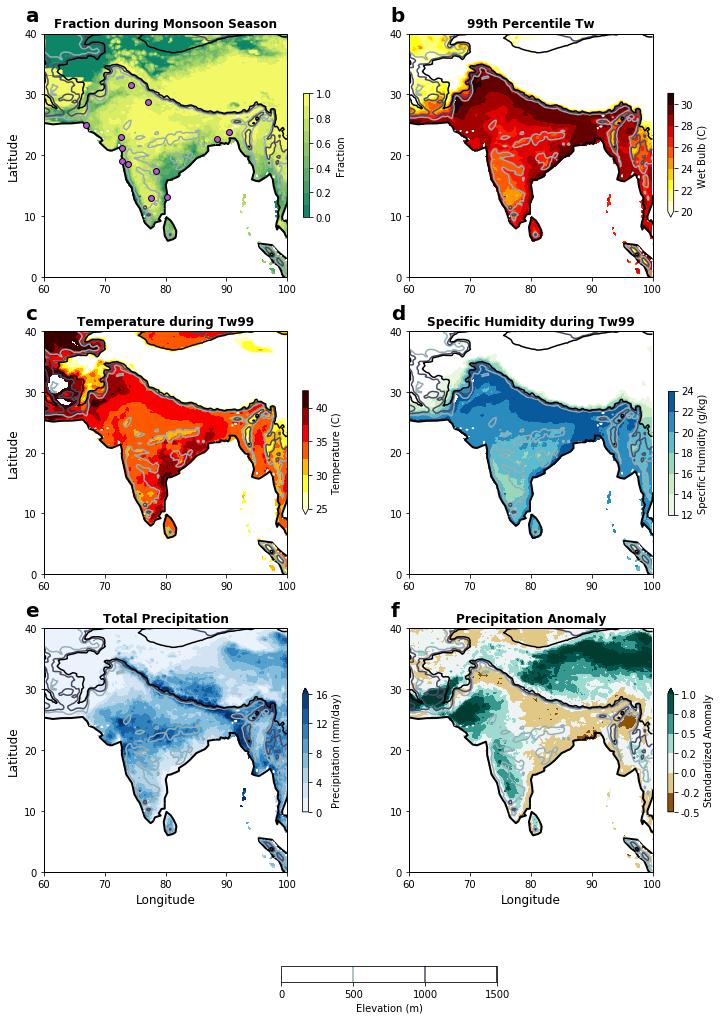

In [38]:
fig, axs = plt.subplots(3,2,figsize = (12,15), facecolor = 'w', edgecolor = 'k', subplot_kw = {'projection': ccrs.PlateCarree()})
import string
from mpl_toolkits.axes_grid1 import make_axes_locatable

labels =['Delhi','Mumbai','Kolkata','Bangalore','Chennai','Hyderabad','Ahmadabad','Surat','Pune','Dhaka','Karachi','Lahore']
lons = [77.1,72.9,88.4,77.6,80.3,78.5,72.6,72.8,73.9,90.4,67.0,74.4]
lats = [28.7,19.1,22.6,13.0,13.1,17.4,23.0,21.2,18.5,23.8,24.9,31.5]

elev_cmap = 'bone_r'

### PANEL A

cmap = plt.cm.get_cmap("summer")
cmap.set_under(color='white')
levels = np.arange(0,1+0.1,0.1)

frac_mesh = axs[0,0].contourf(precip_data_SA.longitude, precip_data_SA.latitude, frac_after, levels = levels, cmap = cmap)
cbar = plt.colorbar(frac_mesh,ax = axs[0,0], shrink = 0.5, format = '%.1f', label = 'Fraction', pad = 0.05) #

axs[0,0].set_ylabel('Latitude', fontsize = 12)
axs[0,0].coastlines(linewidth=2)
axs[0,0].set_xticks([60,70,80,90,100], crs=ccrs.PlateCarree());
axs[0,0].set_yticks([0, 10, 20, 30, 40], crs=ccrs.PlateCarree());
axs[0,0].set_title('Fraction during Monsoon Season', fontweight="bold");

axs[0,0].text(57, 42, string.ascii_lowercase[0], size=20, weight='bold')

elev_levels = np.linspace(0,1500,4)
elev_cont = axs[0,0].contour(elev_land.longitude, elev_land.latitude, elev_land.lsm, cmap = elev_cmap, levels = elev_levels)

# Add scatter plot of 12 most populous cities
for i in range(len(labels)):
    
    axs[0,0].scatter(lons[i],lats[i],  s = 35, c = 'mediumorchid', edgecolors = 'k', marker = 'o', label = labels[i], zorder = 10)

print('panel a done')

### PANEL B

cmap = plt.cm.get_cmap("hot_r")
cmap.set_under(color='white')
levels = np.arange(20,32,1)

TW99_mesh = axs[0,1].contourf(precip_data_SA.longitude, precip_data_SA.latitude, TW99.transpose()- 0*precipanom_99TW.transpose(), levels = levels, extend = 'min', cmap = cmap)
cbar = plt.colorbar(TW99_mesh,ax = axs[0,1], shrink = 0.5, format = '%.1d', label = 'Wet Bulb (C)', pad = 0.05) #ticks=[121, 152, 182,213,244]

axs[0,1].coastlines(linewidth=2)
axs[0,1].set_xticks([60,70,80,90,100], crs=ccrs.PlateCarree());
axs[0,1].set_yticks([0, 10, 20, 30, 40], crs=ccrs.PlateCarree());
axs[0,1].set_title('99th Percentile Tw', fontweight="bold")

axs[0,1].text(57, 42, string.ascii_lowercase[1], size=20, weight='bold')

elev_cont = axs[0,1].contour(elev_land.longitude, elev_land.latitude, elev_land.lsm, cmap = elev_cmap, levels = elev_levels)

print('panel b done')

### PANEL C

cmap = plt.cm.get_cmap("hot_r")
cmap.set_under(color='white')
levels = np.arange(25,45,2.5)

T_mesh = axs[1,0].contourf(precip_data_SA.longitude, precip_data_SA.latitude, T_99TW.transpose()-273.15- 0*precipanom_99TW.transpose(), levels = levels,extend = 'min', cmap = cmap)
cbar = plt.colorbar(T_mesh, ax = axs[1,0], shrink = 0.5, format = '%.1d', ticks = [25,30,35,40], label = 'Temperature (C)', pad = 0.05) #ticks=[121, 152, 182,213,244]

axs[1,0].set_ylabel('Latitude', fontsize = 12)
axs[1,0].coastlines(linewidth=2)
axs[1,0].set_xticks([60,70,80,90,100], crs=ccrs.PlateCarree())
axs[1,0].set_yticks([0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
axs[1,0].set_title('Temperature during Tw99', fontweight="bold");

axs[1,0].text(57, 42, string.ascii_lowercase[2], size=20, weight='bold')

elev_cont = axs[1,0].contour(elev_land.longitude, elev_land.latitude, elev_land.lsm, cmap = elev_cmap, levels = elev_levels)

print('panel c done')

####### PANEL D

cmap = plt.cm.get_cmap("GnBu")
cmap.set_under(color='white')
levels = np.arange(12,26,2)

q_mesh = axs[1,1].contourf(precip_data_SA.longitude, precip_data_SA.latitude, 1000*q_99TW.transpose()- 0*precipanom_99TW.transpose(), levels = levels, cmap = cmap)
cbar = plt.colorbar(q_mesh, ax = axs[1,1], shrink = 0.5, format = '%1d', label = 'Specific Humidity (g/kg)', pad = 0.05) #ticks=[121, 152, 182,213,244]

axs[1,1].coastlines(linewidth=2)
axs[1,1].set_xticks([60,70,80,90,100], crs=ccrs.PlateCarree())
axs[1,1].set_yticks([0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
axs[1,1].set_title('Specific Humidity during Tw99', fontweight="bold");

axs[1,1].text(57, 42, string.ascii_lowercase[3], size=20, weight='bold')

elev_cont = axs[1,1].contour(elev_land.longitude, elev_land.latitude, elev_land.lsm, cmap = elev_cmap, levels = elev_levels)

print('panel d done')

###### PANEL E

cmap = plt.cm.get_cmap("Blues")
cmap.set_under(color='white')
levels = np.arange(0,16+2,2)

precip_mesh = axs[2,0].contourf(precip_data_SA.longitude, precip_data_SA.latitude, precip_99TW.transpose(), levels = levels, extend = 'max', cmap = cmap)
cbar = plt.colorbar(precip_mesh,ax = axs[2,0], shrink = 0.5, format = '%.1d', label = 'Precipitation (mm/day)', ticks=[0, 4, 8,12,16], pad = 0.05) #

axs[2,0].set_ylabel('Latitude', fontsize = 12)
axs[2,0].set_xlabel('Longitude', fontsize = 12)
axs[2,0].coastlines(linewidth=2)
axs[2,0].set_xticks([60,70,80,90,100], crs=ccrs.PlateCarree());
axs[2,0].set_yticks([0, 10, 20, 30, 40], crs=ccrs.PlateCarree());
axs[2,0].set_title('Total Precipitation', fontweight="bold")

axs[2,0].text(57, 42, string.ascii_lowercase[4], size=20, weight='bold')

elev_cont = axs[2,0].contour(elev_land.longitude, elev_land.latitude, elev_land.lsm, cmap = elev_cmap, levels = elev_levels)

print('panel e done')

### PANEL F

cmap = plt.cm.get_cmap("BrBG")
cmap.set_under(color='white')
levels = np.arange(-0.5,1.25,0.25)

orig_cmap = cmap
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.4, name='shifted')

precipanom_mesh = axs[2,1].contourf(precip_data_SA.longitude, precip_data_SA.latitude, precipanom_99TW.transpose()/precip_std, extend = 'max',levels = levels, cmap = shifted_cmap)
cbar = plt.colorbar(precipanom_mesh,ax = axs[2,1], shrink = 0.5, format = '%.1f', label = 'Standardized Anomaly', pad = 0.05) #

axs[2,1].set_xlabel('Longitude', fontsize = 12)
axs[2,1].coastlines(linewidth=2)
axs[2,1].set_xticks([60,70,80,90,100], crs=ccrs.PlateCarree());
axs[2,1].set_yticks([0, 10, 20, 30, 40], crs=ccrs.PlateCarree());
axs[2,1].set_title('Precipitation Anomaly', fontweight="bold");

axs[2,1].text(57, 42, string.ascii_lowercase[5], size=20, weight='bold')

elev_cont = axs[2,1].contour(elev_land.longitude, elev_land.latitude, elev_land.lsm, cmap = elev_cmap, levels = elev_levels)

# Add colorbar for elevation contours below
fig.subplots_adjust(bottom = 0.1)
cbar_ax = fig.add_axes([0.4,0,0.25,0.015])

elev_cbar = plt.colorbar(elev_cont, cax=cbar_ax, orientation = 'horizontal', format = '%1d', label = 'Elevation (m)', ticks = elev_levels, pad = 0.1)

print('panel f done')

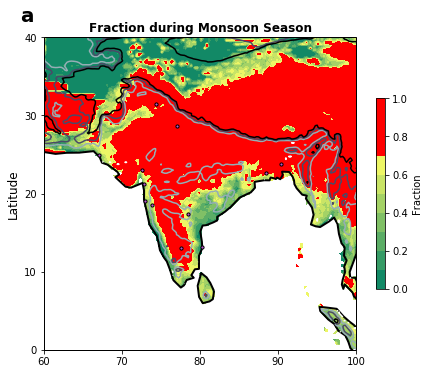

In [46]:
# Checking how much of the subcontinent sees 70% of events during monsoon season, and which cities fall into that category

my_cmap = matplotlib.cm.get_cmap('rainbow')
my_cmap.set_under('w')
imshow(np.arange(25).reshape(5, 5),
       interpolation='none',
       cmap=my_cmap,
       vmin=.001)
fig, axs = plt.subplots(1,1,figsize = (7,7), facecolor = 'w', edgecolor = 'k', subplot_kw = {'projection': ccrs.PlateCarree()})

import string
from mpl_toolkits.axes_grid1 import make_axes_locatable

labels =['Delhi','Mumbai','Kolkata','Bangalore','Chennai','Hyderabad','Ahmedabad','Surat','Pune','Dhaka','Karachi','Lahore']
lons = [77.1,72.9,88.4,77.6,80.3,78.5,72.6,72.8,73.9,90.4,67.0,74.4]
lats = [28.7,19.1,22.6,13.0,13.1,17.4,23.0,21.2,18.5,23.8,24.9,31.5]

elev_cmap = 'bone_r'

cmap = plt.cm.get_cmap("summer")
cmap.set_under(color='white')
cmap.set_over(color = 'red')
levels = np.arange(0,1+0.1,0.1)

frac_mesh = axs.contourf(precip_data_SA.longitude, precip_data_SA.latitude, frac_after, vmin = 0, vmax = 0.7,levels = levels, cmap = cmap)
cbar = plt.colorbar(frac_mesh,ax = axs, shrink = 0.5, format = '%.1f', label = 'Fraction', pad = 0.05) #

axs.set_ylabel('Latitude', fontsize = 12)
axs.coastlines(linewidth=2)
axs.set_xticks([60,70,80,90,100], crs=ccrs.PlateCarree());
axs.set_yticks([0, 10, 20, 30, 40], crs=ccrs.PlateCarree());
axs.set_title('Fraction during Monsoon Season', fontweight="bold");

axs.text(57, 42, string.ascii_lowercase[0], size=20, weight='bold')

elev_levels = np.linspace(0,1500,4)
elev_cont = axs.contour(elev_land.longitude, elev_land.latitude, elev_land.lsm, cmap = elev_cmap, levels = elev_levels)

# Add scatter plot of 12 most populous cities
for i in range(len(labels)):
    
    axs.scatter(lons[i],lats[i],  s = 10, c = 'mediumorchid', edgecolors = 'k', marker = 'o', label = labels[i], zorder = 10)

# Figure S2

In [ ]:
# Create gridded arrays
humidex = temp_unique.t2m - 273.15 + 0.5555*(6.11*np.exp(5417.7530*(1/273.16-1/(273.15+d2m_C)))-10)
humidex_regional = humidex.sel(latitude = slice(40,0),longitude = slice(60,100))

In [ ]:
from datetime import datetime

precip_99hum = np.zeros([160,160])
precipanom_99hum = np.zeros([160,160])
hum99 = np.zeros([160,160])
T_99hum = np.zeros([160,160])
q_99hum = np.zeros([160,160])
dry_hum99 = np.zeros([160,160])
frac_before = np.zeros([160,160])
frac_during = np.zeros([160,160])
frac_post_monsoon = np.zeros([160,160])
frac_after_norm = np.zeros([160,160])
years_array = np.arange(1981,2021)

days_diff = np.zeros([160,160])

for i in range(160):
    
    print('i = ' + str(i))
    
    for j in range(160):
        
        hum_grid = humidex_regional.isel(longitude = j + 1, latitude = -i-1)
        T_grid = temp_regional.isel(longitude = j + 1, latitude = -i-1)
        q_grid = q_regional.isel(longitude = j + 1, latitude = -i-1)
        precip_grid = precip_data_SA.isel(longitude = j, latitude = i)
        precip_anom_grid = precip_data_SA_anom.isel(longitude = j, latitude = i)
        
        # Put all data in dataframe
        pt_hum_df = hum_grid.to_dataframe(name = 'hum')
        pt_hum_df = pt_hum_df.drop(columns = ['longitude','latitude'])
        
        pt_T_df = T_grid.to_dataframe()
        pt_T_df = pt_T_df.drop(columns = ['longitude','latitude'])
        
        pt_q_df = q_grid.to_dataframe()
        pt_q_df = pt_q_df.drop(columns = ['longitude','latitude'])
        
        pt_precip_df = precip_grid.to_dataframe()
        pt_precip_df = pt_precip_df.drop(columns = ['longitude','latitude'])
        pt_precipanom_df = precip_anom_grid.to_dataframe()
        pt_precipanom_df = pt_precipanom_df.drop(columns = ['longitude','latitude'])
        pt_precipanom_df = pt_precipanom_df.rename(columns = {'precip': "precip_anom"})
        
        pt_df_1 = pt_hum_df.join(pt_precip_df, how = 'inner')
        pt_df_2 = pt_df_1.join(pt_T_df, how = 'inner')
        pt_df_3 = pt_df_2.join(pt_q_df, how = 'inner')
        pt_df = pt_df_3.join(pt_precipanom_df, how = 'inner')
        
        # Calculate 99th percentile days at the gridcell
        val_99 = np.nanpercentile(pt_df.hum, 99)
        pt_99 = pt_df[pt_df.hum >= val_99]
        
        hum99[j,i] = val_99
                
        precip_99hum[j,i] = np.mean(pt_99.precip)
        precipanom_99hum[j,i] = np.mean(pt_99.precip_anom)
        T_99hum[j,i] = np.mean(pt_99.t2m)
        q_99hum[j,i] = np.mean(pt_99.q)
        
        # Select only dry days, then calculate TW99
        if np.isnan(np.max(pt_df.precip)) == False:
            pt_dry = pt_df[pt_df.precip < 0.1]
            dry_val_99 = np.percentile(pt_dry.hum, 99)
            dry_hum99[j,i] = dry_val_99
        else:
            dry_hum99[j,i] = np.nan
        
        before_or_after = []
        
        # Calculate fraction of extreme Tw days that happen after monsoon onset
        if np.isnan(np.mean(pt_99.precip)) == False:
            
            monsoon_lengths = []
            day_diff_pt = []
            
            for index, row in pt_99.iterrows():

                if np.isnan(row.precip) == False:

                    date = index
                    year = date.year
                    k = np.argwhere(years_array == year)

                    day_num_onset = int(gridpt_onset_3D[i,j,k])
                    day_num_retreat = int(gridpt_retreat_3D[i,j,k])
                    
                    monsoon_length = day_num_retreat - day_num_onset
                    
                    monsoon_lengths.extend([monsoon_length])

                    # Create an array for each gridcell of how many 99th %ile Tw events happen before, during, or after onset
                    if (day_num_onset != 0) & (day_num_retreat != 0):

                        day_num_99hum = date.timetuple().tm_yday
                        

                        if day_num_99hum > day_num_onset: # given that the event happens after monsoon onset

                            if day_num_99hum >= day_num_retreat:
                                
                                before_or_after.extend([555]) # if after retreat, 555
                                
                            if day_num_99hum < day_num_retreat: 
                                
                                before_or_after.extend([999]) #if before retreat, 999
                                
                        if day_num_99hum < day_num_onset:

                            before_or_after.extend([-999]) #if before, -999

                        if day_num_99hum == day_num_onset:

                            before_or_after.extend([0]) #if same day, 0
                            
                        day_diff_pt.extend([day_num_99hum - day_num_onset])
                            
            before_or_after = np.array(before_or_after)
            num_before = len(before_or_after[(before_or_after == -999)])
            num_during = len(before_or_after[(before_or_after == 999)])
            num_post = len(before_or_after[(before_or_after == 555)])
            frac_before[i,j] = num_before/len(before_or_after)
            frac_during[i,j] = num_during/len(before_or_after)
            frac_post_monsoon[i,j] = num_post/len(before_or_after)
            days_diff[i,j] = np.mean(day_diff_pt)
            
            # Normalize by average monsoon season length
            frac_after_norm[i,j] = (num_after/len(before_or_after))/np.mean(monsoon_lengths)
                            
        else:
            
            frac_during[i,j] = np.nan
            frac_post_monsoon[i,j] = np.nan
            frac_before[i,j] = np.nan
            frac_after_norm[i,j] = np.nan

In [ ]:
# Save all intermediaries to plot
ERA5_dir = '/dx01/ivanov/data/ERA5/monsoon_humidheat_timing/'
CHIRPS_dir = '/dx01/ivanov/data/CHIRPS/monsoon_humidheat_timing/'

np.savetxt(ERA5_dir + 'humidex99_gricell.csv', hum99, delimiter=',')
np.savetxt(ERA5_dir + 'Tduring_humidex99_gricell.csv', T_99hum, delimiter=',')
np.savetxt(ERA5_dir + 'qduring_humidex99_gricell.csv', q_99hum, delimiter=',')

np.savetxt(CHIRPS_dir + 'preciptotalduring_humidex99_gricell.csv', precip_99hum, delimiter=',')
np.savetxt(CHIRPS_dir + 'precipanomduring_humidex99_gricell.csv', precipanom_99hum, delimiter=',')
np.savetxt(CHIRPS_dir + 'fracduringmonsoon_humidex99_gricell.csv', frac_during, delimiter=',')
np.savetxt(CHIRPS_dir + 'fracbeforemonsoon_humidex99_gricell.csv', frac_before, delimiter=',')
np.savetxt(CHIRPS_dir + 'fracaftermonsoon_humidex99_gricell.csv', frac_post_monsoon, delimiter=',')

In [ ]:
fig, axs = plt.subplots(3,2,figsize = (12,15), facecolor = 'w', edgecolor = 'k', subplot_kw = {'projection': ccrs.PlateCarree()})

import string
from mpl_toolkits.axes_grid1 import make_axes_locatable

labels =['Delhi','Mumbai','Kolkata','Bangalore','Chennai','Hyderabad','Ahmadabad','Surat','Pune','Dhaka','Karachi','Lahore']
lons = [77.1,72.9,88.4,77.6,80.3,78.5,72.6,72.8,73.9,90.4,67.0,74.4]
lats = [28.7,19.1,22.6,13.0,13.1,17.4,23.0,21.2,18.5,23.8,24.9,31.5]

elev_cmap = 'bone_r'

### PANEL A

cmap = plt.cm.get_cmap("summer")
cmap.set_under(color='white')
levels = np.arange(0,1+0.1,0.1)

frac_mesh = axs[0,0].contourf(precip_data_SA.longitude, precip_data_SA.latitude, frac_during, levels = levels, cmap = cmap)
cbar = plt.colorbar(frac_mesh,ax = axs[0,0], shrink = 0.5, format = '%.1f', label = 'Fraction', pad = 0.05) #

axs[0,0].set_ylabel('Latitude', fontsize = 12)
axs[0,0].coastlines(linewidth=2)
axs[0,0].set_xticks([60,70,80,90,100], crs=ccrs.PlateCarree());
axs[0,0].set_yticks([0, 10, 20, 30, 40], crs=ccrs.PlateCarree());
axs[0,0].set_title('Fraction during Monsoon Season', fontweight="bold");

axs[0,0].text(57, 42, string.ascii_lowercase[0], size=20, weight='bold')

elev_levels = np.linspace(0,1500,4)
elev_cont = axs[0,0].contour(elev_land.longitude, elev_land.latitude, elev_land.lsm, cmap = elev_cmap, levels = elev_levels)

# Add scatter plot of 12 most populous cities
for i in range(len(labels)):
    
    axs[0,0].scatter(lons[i],lats[i],  s = 35, c = 'mediumorchid', edgecolors = 'k', marker = 'o', label = labels[i], zorder = 10)

print('panel a done')

### PANEL B

cmap = plt.cm.get_cmap("hot_r")
cmap.set_under(color='white')
levels = np.arange(15,60,5)

hum99_mesh = axs[0,1].contourf(precip_data_SA.longitude, precip_data_SA.latitude, hum99.transpose()- 0*precipanom_99hum.transpose(), levels = levels, extend = 'min', cmap = cmap)
cbar = plt.colorbar(hum99_mesh,ax = axs[0,1], shrink = 0.5, format = '%.1d', label = 'Humidex (C)', pad = 0.05) #ticks=[121, 152, 182,213,244]

axs[0,1].coastlines(linewidth=2)
axs[0,1].set_xticks([60,70,80,90,100], crs=ccrs.PlateCarree());
axs[0,1].set_yticks([0, 10, 20, 30, 40], crs=ccrs.PlateCarree());
axs[0,1].set_title('99th Percentile Humidex', fontweight="bold")

axs[0,1].text(57, 42, string.ascii_lowercase[1], size=20, weight='bold')

elev_cont = axs[0,1].contour(elev_land.longitude, elev_land.latitude, elev_land.lsm, cmap = elev_cmap, levels = elev_levels)


print('panel b done')

### PANEL C

cmap = plt.cm.get_cmap("hot_r")
cmap.set_under(color='white')
levels = np.arange(25,45,2.5)

T_mesh = axs[1,0].contourf(precip_data_SA.longitude, precip_data_SA.latitude, T_99hum.transpose()-273.15- 0*precipanom_99hum.transpose(), levels = levels,extend = 'min', cmap = cmap)
cbar = plt.colorbar(T_mesh, ax = axs[1,0], shrink = 0.5, format = '%.1d', ticks = [25,30,35,40], label = 'Temperature (C)', pad = 0.05) #ticks=[121, 152, 182,213,244]

axs[1,0].set_ylabel('Latitude', fontsize = 12)
axs[1,0].coastlines(linewidth=2)
axs[1,0].set_xticks([60,70,80,90,100], crs=ccrs.PlateCarree())
axs[1,0].set_yticks([0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
axs[1,0].set_title('Temperature during Hum99', fontweight="bold");

axs[1,0].text(57, 42, string.ascii_lowercase[2], size=20, weight='bold')

elev_cont = axs[1,0].contour(elev_land.longitude, elev_land.latitude, elev_land.lsm, cmap = elev_cmap, levels = elev_levels)

print('panel c done')

####### PANEL D

cmap = plt.cm.get_cmap("GnBu")
cmap.set_under(color='white')
levels = np.arange(12,26,2)

q_mesh = axs[1,1].contourf(precip_data_SA.longitude, precip_data_SA.latitude, 1000*q_99hum.transpose()- 0*precipanom_99hum.transpose(), levels = levels, cmap = cmap)
cbar = plt.colorbar(q_mesh, ax = axs[1,1], shrink = 0.5, format = '%1d', label = 'Specific Humidity (g/kg)', pad = 0.05) #ticks=[121, 152, 182,213,244]

axs[1,1].coastlines(linewidth=2)
axs[1,1].set_xticks([60,70,80,90,100], crs=ccrs.PlateCarree())
axs[1,1].set_yticks([0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
axs[1,1].set_title('Specific Humidity during Hum99', fontweight="bold");

axs[1,1].text(57, 42, string.ascii_lowercase[3], size=20, weight='bold')

elev_cont = axs[1,1].contour(elev_land.longitude, elev_land.latitude, elev_land.lsm, cmap = elev_cmap, levels = elev_levels)

print('panel d done')

###### PANEL E

cmap = plt.cm.get_cmap("Blues")
cmap.set_under(color='white')
levels = np.arange(0,16+2,2)

precip_mesh = axs[2,0].contourf(precip_data_SA.longitude, precip_data_SA.latitude, precip_99hum.transpose(), levels = levels, extend = 'max', cmap = cmap)
cbar = plt.colorbar(precip_mesh,ax = axs[2,0], shrink = 0.5, format = '%.1d', label = 'Precipitation (mm/day)', ticks=[0, 4, 8,12,16], pad = 0.05) #

axs[2,0].set_ylabel('Latitude', fontsize = 12)
axs[2,0].set_xlabel('Longitude', fontsize = 12)
axs[2,0].coastlines(linewidth=2)
axs[2,0].set_xticks([60,70,80,90,100], crs=ccrs.PlateCarree());
axs[2,0].set_yticks([0, 10, 20, 30, 40], crs=ccrs.PlateCarree());
axs[2,0].set_title('Total Precipitation', fontweight="bold")

axs[2,0].text(57, 42, string.ascii_lowercase[4], size=20, weight='bold')

elev_cont = axs[2,0].contour(elev_land.longitude, elev_land.latitude, elev_land.lsm, cmap = elev_cmap, levels = elev_levels)

print('panel e done')

### PANEL F

cmap = plt.cm.get_cmap("BrBG")
cmap.set_under(color='white')
levels = np.arange(-0.5,1.25,0.25)

orig_cmap = cmap
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.4, name='shifted')

precipanom_mesh = axs[2,1].contourf(precip_data_SA.longitude, precip_data_SA.latitude, precipanom_99hum.transpose()/precip_std, extend = 'max',levels = levels, cmap = cmap)
cbar = plt.colorbar(precipanom_mesh,ax = axs[2,1], shrink = 0.5, format = '%.1f', label = 'Standardized Anomaly', pad = 0.05) #

axs[2,1].set_xlabel('Longitude', fontsize = 12)
axs[2,1].coastlines(linewidth=2)
axs[2,1].set_xticks([60,70,80,90,100], crs=ccrs.PlateCarree());
axs[2,1].set_yticks([0, 10, 20, 30, 40], crs=ccrs.PlateCarree());
axs[2,1].set_title('Precipitation Anomaly', fontweight="bold");

axs[2,1].text(57, 42, string.ascii_lowercase[5], size=20, weight='bold')

elev_cont = axs[2,1].contour(elev_land.longitude, elev_land.latitude, elev_land.lsm, cmap = elev_cmap, levels = elev_levels)

# Add colorbar for elevation contours below
fig.subplots_adjust(bottom = 0.1)
cbar_ax = fig.add_axes([0.4,0,0.25,0.015])

elev_cbar = plt.colorbar(elev_cont, cax=cbar_ax, orientation = 'horizontal', format = '%1d', label = 'Elevation (m)', ticks = elev_levels, pad = 0.1)

print('panel f done')